<a href="https://colab.research.google.com/github/Phattharyu/CPE_232-Final_project-GoldPrediction-/blob/main/Gold_Proj_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library & Data from Google Drive using gdown**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf
import pandas_datareader as pdr

from datetime import datetime

!gdown 14iSHWNraKglyrcLFQe5-GprkjkO6xaCK

df = pd.read_csv('Merged_Gold_dataset.csv')
df

Downloading...
From: https://drive.google.com/uc?id=14iSHWNraKglyrcLFQe5-GprkjkO6xaCK
To: /content/Merged_Gold_dataset.csv
100% 1.02M/1.02M [00:00<00:00, 12.9MB/s]


Unnamed: 0        Date        Close         High          Low  \
0              0  2005-03-28   425.899994   425.899994   425.899994   
1              1  2005-03-29   426.000000   426.000000   426.000000   
2              2  2005-03-31   428.700012   428.700012   428.700012   
3              3  2005-04-01   425.899994   428.500000   424.500000   
4              4  2005-04-04   423.899994   426.299988   422.700012   
...          ...         ...          ...          ...          ...   
5003        5003  2025-02-21  2937.600098  2940.000000  2917.300049   
5004        5004  2025-02-24  2947.899902  2957.899902  2933.100098   
5005        5005  2025-02-25  2904.500000  2943.199951  2890.000000   
5006        5006  2025-02-26  2916.800049  2917.000000  2913.000000   
5007        5007  2025-02-27  2883.199951  2922.800049  2870.399902   

             Open  Volume        RSI        SMA10        SMA20  CPIAUCSL  \
0      425.899994       0  33.386323   434.190002   435.730000   193.100   
1      426.000000       0  33.629056   432.680002   435.205000   193.100   
2      428.700012    3051  39.987248   431.460004   434.995001   193.100   
3      428.299988     552  36.122564   429.680002   434.650002   193.700   
4      426.000000     486  33.622901   428.200000   434.350002   193.700   
...           ...     ...        ...          ...          ...       ...   
5003  2938.800049     570  68.447600  2914.120020  2862.110022   319.775   
5004  2933.100098     415  69.639013  2922.180005  2870.640015   319.775   
5005  2938.699951    1854  59.452120  2921.200000  2878.990015   319.775   
5006  2913.500000    2050  61.185088  2921.630005  2886.490015   319.775   
5007  2918.500000    3215  54.351452  2919.050000  2892.195007   319.775   

      CIVPART        GDP  GEPUCURRENT   PPIACO  UNRATE        CLI  \
0        65.9  12767.286    54.055710  153.700     5.2  100.34460   
1        65.9  12767.286    54.055710  153.700     5.2  100.34460   
2        65.9  12767.286    54.055710  153.700     5.2  100.34460   
3        66.1  12922.656    68.682759  155.000     5.2  100.29310   
4        66.1  12922.656    68.682759  155.000     5.2  100.29310   
...       ...        ...          ...      ...     ...        ...   
5003     62.4  29723.864   429.830565  259.805     4.1   99.85411   
5004     62.4  29723.864   429.830565  259.805     4.1   99.85411   
5005     62.4  29723.864   429.830565  259.805     4.1   99.85411   
5006     62.4  29723.864   429.830565  259.805     4.1   99.85411   
5007     62.4  29723.864   429.830565  259.805     4.1   99.85411   

      GDP_Reference  
0          100.4980  
1          100.4980  
2          100.4980  
3          100.5254  
4          100.5254  
...             ...  
5003       100.4912  
5004       100.4912  
5005       100.4912  
5006       100.4912  
5007       100.4912  

[5008 rows x 18 columns]

In [ ]:
df

Unnamed: 0        Date        Close         High          Low  \
0              0  2005-03-28   425.899994   425.899994   425.899994   
1              1  2005-03-29   426.000000   426.000000   426.000000   
2              2  2005-03-31   428.700012   428.700012   428.700012   
3              3  2005-04-01   425.899994   428.500000   424.500000   
4              4  2005-04-04   423.899994   426.299988   422.700012   
...          ...         ...          ...          ...          ...   
5003        5003  2025-02-21  2937.600098  2940.000000  2917.300049   
5004        5004  2025-02-24  2947.899902  2957.899902  2933.100098   
5005        5005  2025-02-25  2904.500000  2943.199951  2890.000000   
5006        5006  2025-02-26  2916.800049  2917.000000  2913.000000   
5007        5007  2025-02-27  2883.199951  2922.800049  2870.399902   

             Open  Volume        RSI        SMA10        SMA20  CPIAUCSL  \
0      425.899994       0  33.386323   434.190002   435.730000   193.100   
1      426.000000       0  33.629056   432.680002   435.205000   193.100   
2      428.700012    3051  39.987248   431.460004   434.995001   193.100   
3      428.299988     552  36.122564   429.680002   434.650002   193.700   
4      426.000000     486  33.622901   428.200000   434.350002   193.700   
...           ...     ...        ...          ...          ...       ...   
5003  2938.800049     570  68.447600  2914.120020  2862.110022   319.775   
5004  2933.100098     415  69.639013  2922.180005  2870.640015   319.775   
5005  2938.699951    1854  59.452120  2921.200000  2878.990015   319.775   
5006  2913.500000    2050  61.185088  2921.630005  2886.490015   319.775   
5007  2918.500000    3215  54.351452  2919.050000  2892.195007   319.775   

      CIVPART        GDP  GEPUCURRENT   PPIACO  UNRATE        CLI  \
0        65.9  12767.286    54.055710  153.700     5.2  100.34460   
1        65.9  12767.286    54.055710  153.700     5.2  100.34460   
2        65.9  12767.286    54.055710  153.700     5.2  100.34460   
3        66.1  12922.656    68.682759  155.000     5.2  100.29310   
4        66.1  12922.656    68.682759  155.000     5.2  100.29310   
...       ...        ...          ...      ...     ...        ...   
5003     62.4  29723.864   429.830565  259.805     4.1   99.85411   
5004     62.4  29723.864   429.830565  259.805     4.1   99.85411   
5005     62.4  29723.864   429.830565  259.805     4.1   99.85411   
5006     62.4  29723.864   429.830565  259.805     4.1   99.85411   
5007     62.4  29723.864   429.830565  259.805     4.1   99.85411   

      GDP_Reference  
0          100.4980  
1          100.4980  
2          100.4980  
3          100.5254  
4          100.5254  
...             ...  
5003       100.4912  
5004       100.4912  
5005       100.4912  
5006       100.4912  
5007       100.4912  

[5008 rows x 18 columns]

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

Date        Close         High          Low         Open  Volume  \
0     2005-03-28   425.899994   425.899994   425.899994   425.899994       0   
1     2005-03-29   426.000000   426.000000   426.000000   426.000000       0   
2     2005-03-31   428.700012   428.700012   428.700012   428.700012    3051   
3     2005-04-01   425.899994   428.500000   424.500000   428.299988     552   
4     2005-04-04   423.899994   426.299988   422.700012   426.000000     486   
...          ...          ...          ...          ...          ...     ...   
5003  2025-02-21  2937.600098  2940.000000  2917.300049  2938.800049     570   
5004  2025-02-24  2947.899902  2957.899902  2933.100098  2933.100098     415   
5005  2025-02-25  2904.500000  2943.199951  2890.000000  2938.699951    1854   
5006  2025-02-26  2916.800049  2917.000000  2913.000000  2913.500000    2050   
5007  2025-02-27  2883.199951  2922.800049  2870.399902  2918.500000    3215   

            RSI        SMA10        SMA20  CPIAUCSL  CIVPART        GDP  \
0     33.386323   434.190002   435.730000   193.100     65.9  12767.286   
1     33.629056   432.680002   435.205000   193.100     65.9  12767.286   
2     39.987248   431.460004   434.995001   193.100     65.9  12767.286   
3     36.122564   429.680002   434.650002   193.700     66.1  12922.656   
4     33.622901   428.200000   434.350002   193.700     66.1  12922.656   
...         ...          ...          ...       ...      ...        ...   
5003  68.447600  2914.120020  2862.110022   319.775     62.4  29723.864   
5004  69.639013  2922.180005  2870.640015   319.775     62.4  29723.864   
5005  59.452120  2921.200000  2878.990015   319.775     62.4  29723.864   
5006  61.185088  2921.630005  2886.490015   319.775     62.4  29723.864   
5007  54.351452  2919.050000  2892.195007   319.775     62.4  29723.864   

      GEPUCURRENT   PPIACO  UNRATE        CLI  GDP_Reference  
0       54.055710  153.700     5.2  100.34460       100.4980  
1       54.055710  153.700     5.2  100.34460       100.4980  
2       54.055710  153.700     5.2  100.34460       100.4980  
3       68.682759  155.000     5.2  100.29310       100.5254  
4       68.682759  155.000     5.2  100.29310       100.5254  
...           ...      ...     ...        ...            ...  
5003   429.830565  259.805     4.1   99.85411       100.4912  
5004   429.830565  259.805     4.1   99.85411       100.4912  
5005   429.830565  259.805     4.1   99.85411       100.4912  
5006   429.830565  259.805     4.1   99.85411       100.4912  
5007   429.830565  259.805     4.1   99.85411       100.4912  

[5008 rows x 17 columns]

In [ ]:
df.corr(numeric_only=True)

Close      High       Low      Open    Volume       RSI  \
Close          1.000000  0.999804  0.999848  0.999647  0.011110  0.056102   
High           0.999804  1.000000  0.999690  0.999834  0.010136  0.052526   
Low            0.999848  0.999690  1.000000  0.999767  0.012452  0.052978   
Open           0.999647  0.999834  0.999767  1.000000  0.011446  0.049126   
Volume         0.011110  0.010136  0.012452  0.011446  1.000000 -0.012192   
RSI            0.056102  0.052526  0.052978  0.049126 -0.012192  1.000000   
SMA10          0.998708  0.998855  0.998783  0.998966  0.011804  0.018972   
SMA20          0.997313  0.997459  0.997415  0.997592  0.011963 -0.007342   
CPIAUCSL       0.872774  0.871735  0.874127  0.872586  0.003536 -0.014676   
CIVPART       -0.752249 -0.751766 -0.753077 -0.752268 -0.016081  0.121702   
GDP            0.833702  0.832376  0.835329  0.833431  0.002869 -0.006387   
GEPUCURRENT    0.740655  0.741015  0.740459  0.740425  0.019215  0.028437   
PPIACO         0.841121  0.840397  0.842230  0.841154  0.001425 -0.056291   
UNRATE        -0.059680 -0.057307 -0.062724 -0.059515  0.007951  0.042505   
CLI           -0.149081 -0.151421 -0.146818 -0.149046 -0.006660 -0.051882   
GDP_Reference -0.251865 -0.253908 -0.249747 -0.251921 -0.009115 -0.003192   

                  SMA10     SMA20  CPIAUCSL   CIVPART       GDP  GEPUCURRENT  \
Close          0.998708  0.997313  0.872774 -0.752249  0.833702     0.740655   
High           0.998855  0.997459  0.871735 -0.751766  0.832376     0.741015   
Low            0.998783  0.997415  0.874127 -0.753077  0.835329     0.740459   
Open           0.998966  0.997592  0.872586 -0.752268  0.833431     0.740425   
Volume         0.011804  0.011963  0.003536 -0.016081  0.002869     0.019215   
RSI            0.018972 -0.007342 -0.014676  0.121702 -0.006387     0.028437   
SMA10          1.000000  0.999273  0.873151 -0.755273  0.833788     0.740134   
SMA20          0.999273  1.000000  0.873465 -0.758442  0.833877     0.739234   
CPIAUCSL       0.873151  0.873465  1.000000 -0.761020  0.992917     0.764638   
CIVPART       -0.755273 -0.758442 -0.761020  1.000000 -0.748032    -0.704932   
GDP            0.833788  0.833877  0.992917 -0.748032  1.000000     0.760197   
GEPUCURRENT    0.740134  0.739234  0.764638 -0.704932  0.760197     1.000000   
PPIACO         0.842896  0.844762  0.923692 -0.647723  0.893352     0.631217   
UNRATE        -0.060396 -0.061777 -0.424960  0.151635 -0.499136    -0.179064   
CLI           -0.146759 -0.143694 -0.104947  0.115453 -0.063550    -0.365686   
GDP_Reference -0.251503 -0.250819 -0.112536  0.367344 -0.067840    -0.418080   

                 PPIACO    UNRATE       CLI  GDP_Reference  
Close          0.841121 -0.059680 -0.149081      -0.251865  
High           0.840397 -0.057307 -0.151421      -0.253908  
Low            0.842230 -0.062724 -0.146818      -0.249747  
Open           0.841154 -0.059515 -0.149046      -0.251921  
Volume         0.001425  0.007951 -0.006660      -0.009115  
RSI           -0.056291  0.042505 -0.051882      -0.003192  
SMA10          0.842896 -0.060396 -0.146759      -0.251503  
SMA20          0.844762 -0.061777 -0.143694      -0.250819  
CPIAUCSL       0.923692 -0.424960 -0.104947      -0.112536  
CIVPART       -0.647723  0.151635  0.115453       0.367344  
GDP            0.893352 -0.499136 -0.063550      -0.067840  
GEPUCURRENT    0.631217 -0.179064 -0.365686      -0.418080  
PPIACO         1.000000 -0.351938  0.016990      -0.006729  
UNRATE        -0.351938  1.000000 -0.439803      -0.629471  
CLI            0.016990 -0.439803  1.000000       0.742476  
GDP_Reference -0.006729 -0.629471  0.742476       1.000000

In [ ]:
#CPIAUCSL	CIVPART	GDP	GEPUCURRENT	PPIACO

# **MinMaxScaler**

# **Data Processing**

In [ ]:
train_size = round(len(df)*0.75)
val_size = round(len(df)*0.9) - round(len(df)*0.75)
test_size = len(df) - train_size - val_size
print('Train:',train_size,'Valid:',val_size,'Test:',test_size)

Train: 3756 Valid: 751 Test: 501


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_sma10[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_sma10[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_sma10[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])

In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 20,callbacks=[cp])

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0513 - root_mean_squared_error: 0.2227 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1179
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.1282e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.0975e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0478
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.4746e-05 - root_mean_squared_error: 0.0097 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.4871e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0397
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 7.6383e-05 - root_mean_squared_error: 0.0087 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0375
Epoch 7/20
118/118 ━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0276e-04 - root_mean_squared_error: 0.0133  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
CPU times: user 317 ms, sys: 7.76 ms, total: 325 ms
Wall time: 401 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.0005049999454058707
Test RMSE: 0.022472204640507698
Test MAPE: 0.02023320524723605
Test Accuracy: 0.979766794752764


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


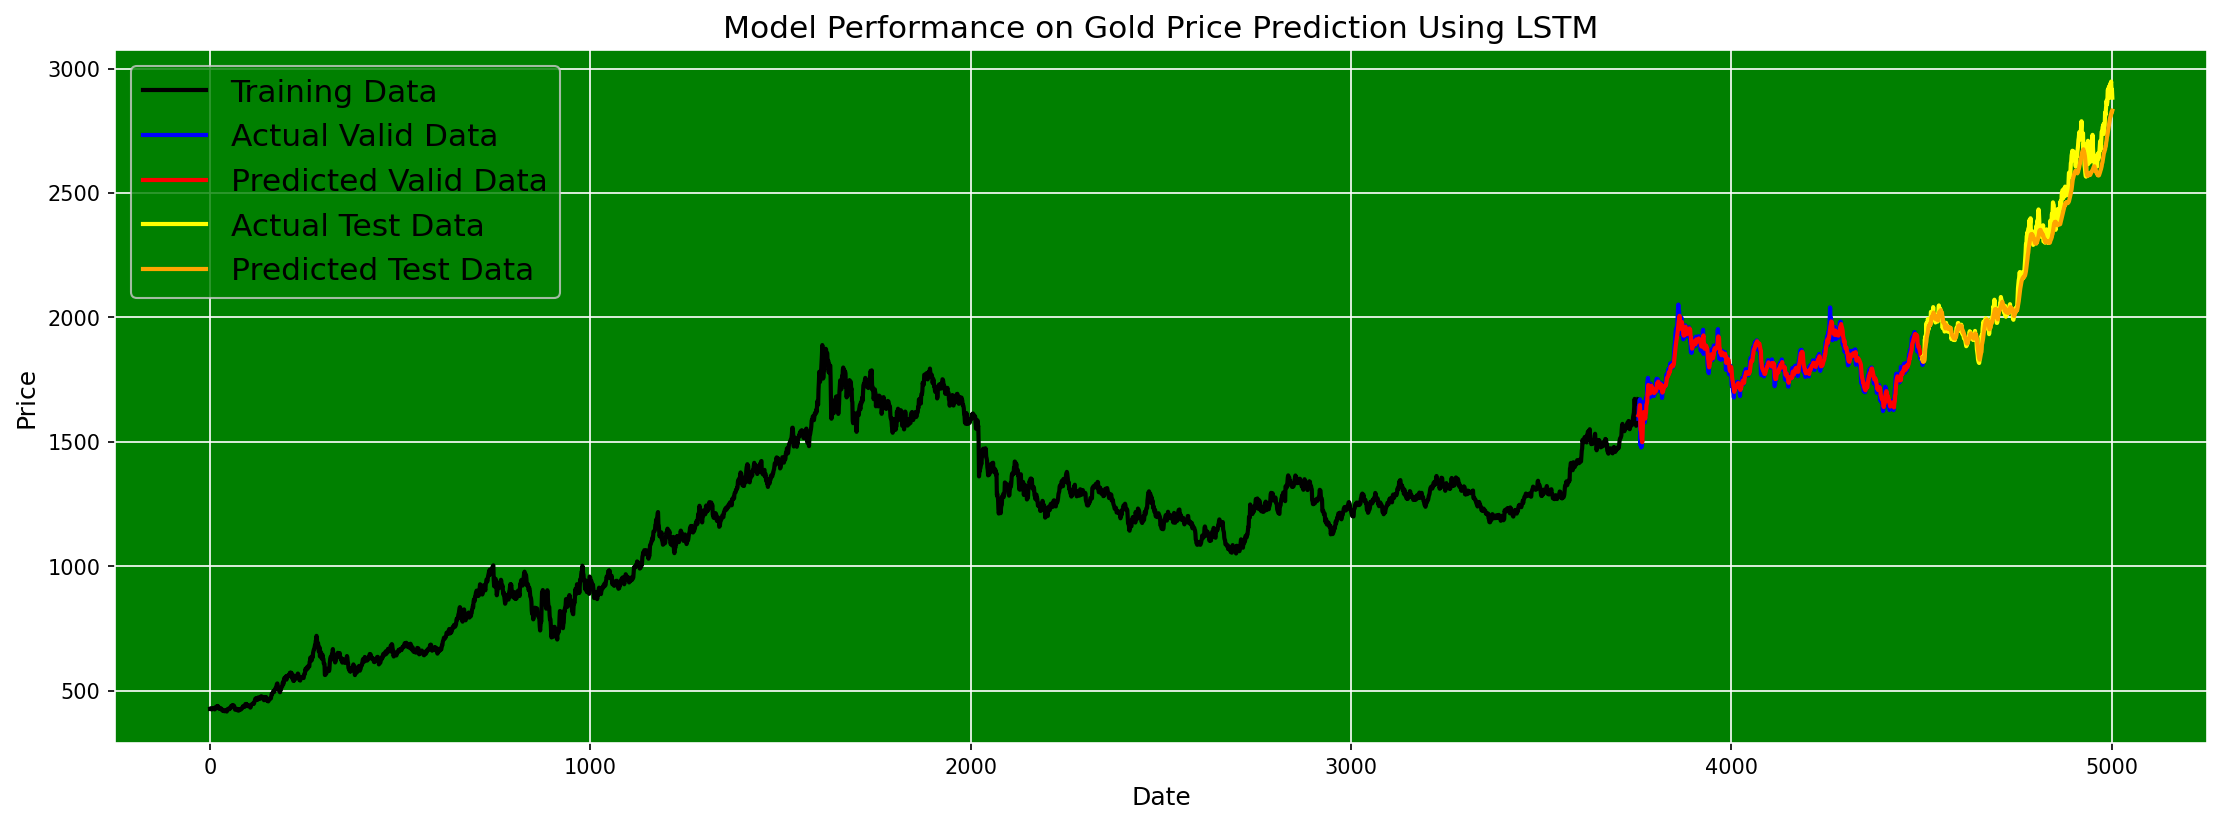

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using LSTM', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
df

Date        Close         High          Low         Open  Volume  \
0     2005-03-28   425.899994   425.899994   425.899994   425.899994       0   
1     2005-03-29   426.000000   426.000000   426.000000   426.000000       0   
2     2005-03-31   428.700012   428.700012   428.700012   428.700012    3051   
3     2005-04-01   425.899994   428.500000   424.500000   428.299988     552   
4     2005-04-04   423.899994   426.299988   422.700012   426.000000     486   
...          ...          ...          ...          ...          ...     ...   
5003  2025-02-21  2937.600098  2940.000000  2917.300049  2938.800049     570   
5004  2025-02-24  2947.899902  2957.899902  2933.100098  2933.100098     415   
5005  2025-02-25  2904.500000  2943.199951  2890.000000  2938.699951    1854   
5006  2025-02-26  2916.800049  2917.000000  2913.000000  2913.500000    2050   
5007  2025-02-27  2883.199951  2922.800049  2870.399902  2918.500000    3215   

            RSI        SMA10        SMA20  CPIAUCSL  CIVPART        GDP  \
0     33.386323   434.190002   435.730000   193.100     65.9  12767.286   
1     33.629056   432.680002   435.205000   193.100     65.9  12767.286   
2     39.987248   431.460004   434.995001   193.100     65.9  12767.286   
3     36.122564   429.680002   434.650002   193.700     66.1  12922.656   
4     33.622901   428.200000   434.350002   193.700     66.1  12922.656   
...         ...          ...          ...       ...      ...        ...   
5003  68.447600  2914.120020  2862.110022   319.775     62.4  29723.864   
5004  69.639013  2922.180005  2870.640015   319.775     62.4  29723.864   
5005  59.452120  2921.200000  2878.990015   319.775     62.4  29723.864   
5006  61.185088  2921.630005  2886.490015   319.775     62.4  29723.864   
5007  54.351452  2919.050000  2892.195007   319.775     62.4  29723.864   

      GEPUCURRENT   PPIACO  UNRATE        CLI  GDP_Reference  
0       54.055710  153.700     5.2  100.34460       100.4980  
1       54.055710  153.700     5.2  100.34460       100.4980  
2       54.055710  153.700     5.2  100.34460       100.4980  
3       68.682759  155.000     5.2  100.29310       100.5254  
4       68.682759  155.000     5.2  100.29310       100.5254  
...           ...      ...     ...        ...            ...  
5003   429.830565  259.805     4.1   99.85411       100.4912  
5004   429.830565  259.805     4.1   99.85411       100.4912  
5005   429.830565  259.805     4.1   99.85411       100.4912  
5006   429.830565  259.805     4.1   99.85411       100.4912  
5007   429.830565  259.805     4.1   99.85411       100.4912  

[5008 rows x 17 columns]

**Price**

In [ ]:
# Close/High/Low/Open/Volume

In [ ]:
# Predicting gold price using High value

train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
# Close
scaler_Close = MinMaxScaler()
scaler_Close.fit(df.Close.values.reshape(-1,1))
train_data_Close = df['Close'][:train_size]
train_data_Close = scaler_Close.transform(train_data_Close.values.reshape(-1,1))

val_data_Close = df['Close'][train_size:train_size+val_size]
val_data_Close = scaler_Close.transform(val_data_Close.values.reshape(-1,1))

test_data_Close = df['Close'][train_size+val_size:]
test_data_Close = scaler_Close.transform(test_data_Close.values.reshape(-1,1))

In [ ]:
# Low
scaler_Low = MinMaxScaler()
scaler_Low.fit(df.Low.values.reshape(-1,1))
train_data_Low = df['Low'][:train_size]
train_data_Low = scaler_Low.transform(train_data_Low.values.reshape(-1,1))

val_data_Low = df['Low'][train_size:train_size+val_size]
val_data_Low = scaler_Low.transform(val_data_Low.values.reshape(-1,1))

test_data_Low = df['Low'][train_size+val_size:]
test_data_Low = scaler_Low.transform(test_data_Low.values.reshape(-1,1))

In [ ]:
# Open
scaler_Open = MinMaxScaler()
scaler_Open.fit(df.Open.values.reshape(-1,1))
train_data_Open = df['Open'][:train_size]
train_data_Open = scaler_Open.transform(train_data_Open.values.reshape(-1,1))

val_data_Open = df['Open'][train_size:train_size+val_size]
val_data_Open = scaler_Open.transform(val_data_Open.values.reshape(-1,1))

test_data_Open = df['Open'][train_size+val_size:]
test_data_Open = scaler_Open.transform(test_data_Open.values.reshape(-1,1))

In [ ]:
# Volume
scaler_Volume = MinMaxScaler()
scaler_Volume.fit(df.Volume.values.reshape(-1,1))
train_data_Volume = df['Volume'][:train_size]
train_data_Volume = scaler_Volume.transform(train_data_Volume.values.reshape(-1,1))

val_data_Volume = df['Volume'][train_size:train_size+val_size]
val_data_Volume = scaler_Volume.transform(val_data_Volume.values.reshape(-1,1))

test_data_Volume = df['Volume'][train_size+val_size:]
test_data_Volume = scaler_Volume.transform(test_data_Volume.values.reshape(-1,1))

In [ ]:
# Feature
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data[i:i+window])
  temp = np.append(temp, train_data_Close[i:i+window])
  temp = np.append(temp, train_data_Low[i:i+window])
  temp = np.append(temp, train_data_Open[i:i+window])
  temp = np.append(temp, train_data_Volume[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data[i+3751-window:i+3751])
  temp = np.append(temp, train_data_Close[i+3751-window:i+3751])
  temp = np.append(temp, train_data_Low[i+3751-window:i+3751])
  temp = np.append(temp, train_data_Open[i+3751-window:i+3751])
  temp = np.append(temp, train_data_Volume[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data[i:i+window])
  temp = np.append(temp, val_data_Close[i:i+window])
  temp = np.append(temp, val_data_Low[i:i+window])
  temp = np.append(temp, val_data_Open[i:i+window])
  temp = np.append(temp, val_data_Volume[i:i+window])

  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data[i-window-window+len(x_val):i+len(x_val)-window])
  temp = np.append(temp, val_data_Close[i-window-window+len(x_val):i+len(x_val)-window])
  temp = np.append(temp, val_data_Low[i-window-window+len(x_val):i+len(x_val)-window])
  temp = np.append(temp, val_data_Open[i-window-window+len(x_val):i+len(x_val)-window])
  temp = np.append(temp, val_data_Volume[i-window-window+len(x_val):i+len(x_val)-window])

  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data[i:i+window])
  temp = np.append(temp, test_data_Close[i:i+window])
  temp = np.append(temp, test_data_Low[i:i+window])
  temp = np.append(temp, test_data_Open[i:i+window])
  temp = np.append(temp, test_data_Volume[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 30, 1), (3751, 1), (751, 30, 1), (751, 1), (501, 30, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 29, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1856)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │        14,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,057 (58.82 KB)

 Trainable params: 15,057 (58.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])

In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 40,callbacks=[cp])

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1081 - root_mean_squared_error: 0.3253 - val_loss: 0.0506 - val_root_mean_squared_error: 0.2249
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - root_mean_squared_error: 0.0509 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5136e-05 - root_mean_squared_error: 0.0080 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3683e-05 - root_mean_squared_error: 0.0066 - val_loss: 9.9970e-04 - val_root_mean_squared_error: 0.0316
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.6797e-05 - root_mean_squared_error: 0.0061 - val_loss: 7.9691e-04 - val_root_mean_squared_error: 0.0282
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.7301e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.7969e-04 - val_root_mean_squared_error: 0.0261
Epoch 7/40
118/118 ━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4021e-05 - root_mean_squared_error: 0.0073


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
CPU times: user 283 ms, sys: 12.7 ms, total: 296 ms
Wall time: 418 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 7.622961129527539e-05
Test RMSE: 0.008730956353247166
Test MAPE: 0.009033344798020067
Test Accuracy: 0.9909666552019799


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


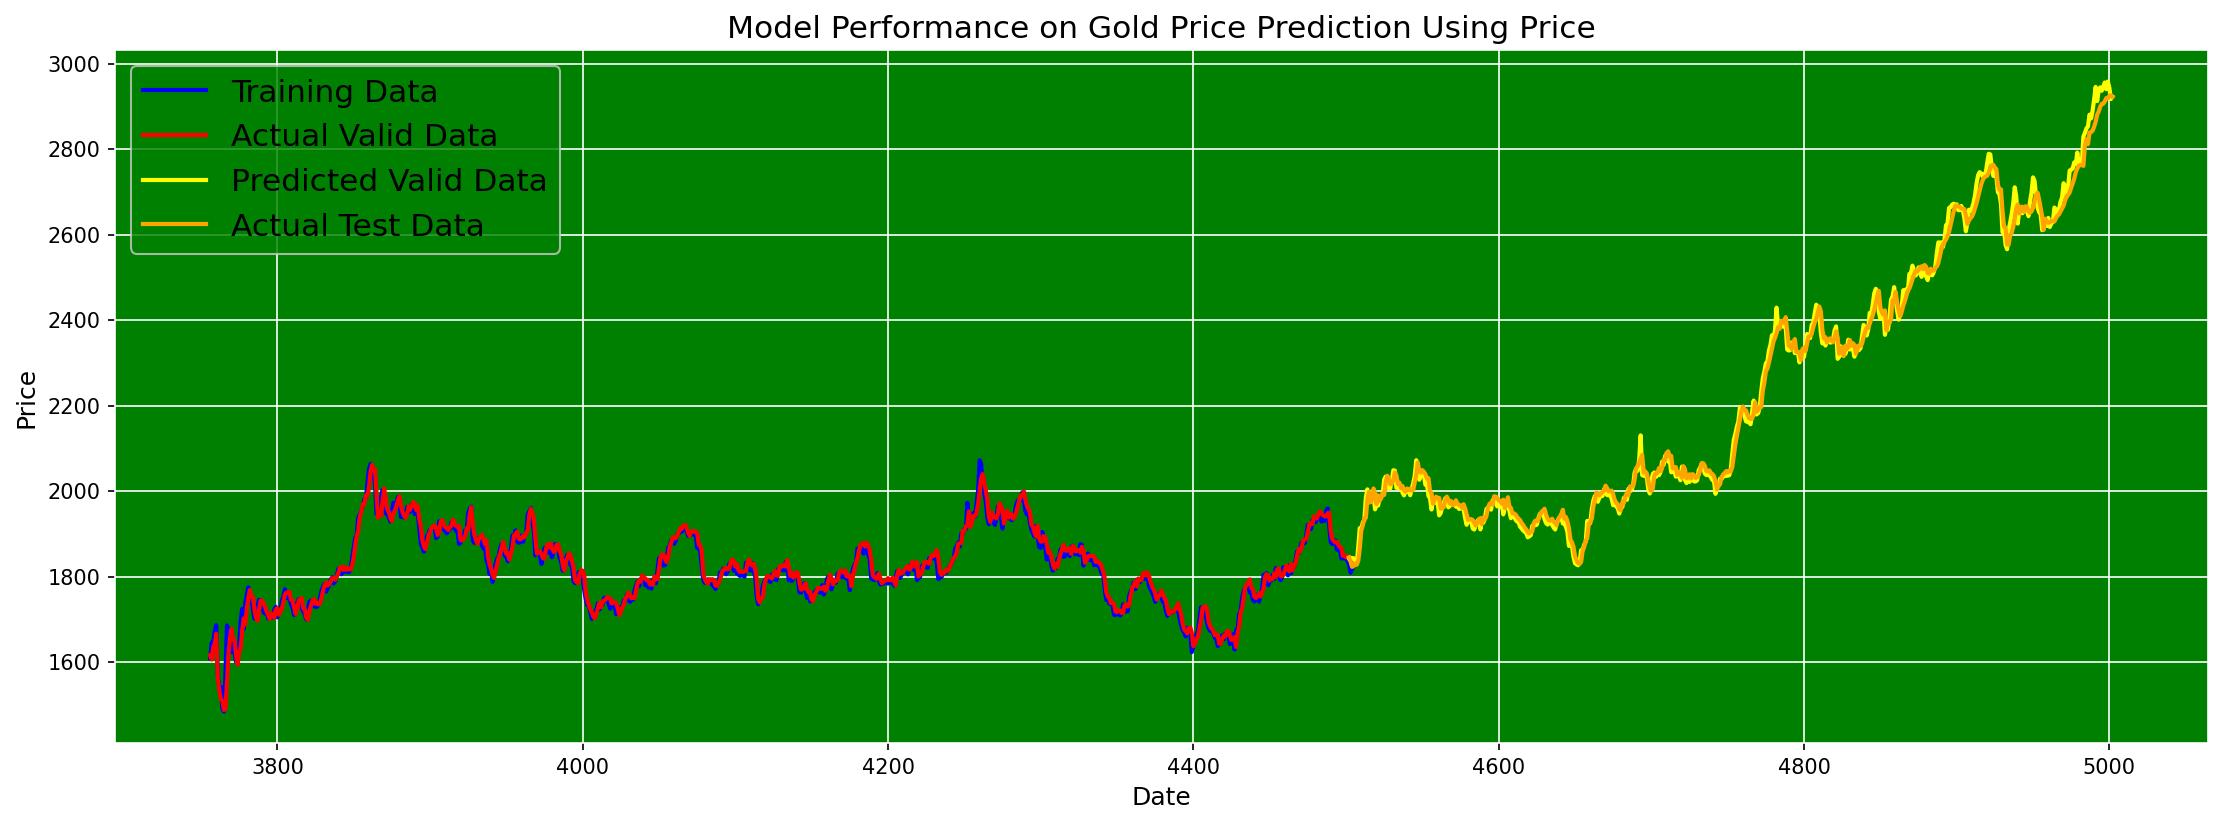

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Case : Close + High**

In [ ]:
# Train Close

train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
# Scale High

scaler_High = MinMaxScaler()
scaler_High.fit(df.High.values.reshape(-1,1))
train_data_High = df['High'][:train_size]
train_data_High = scaler_High.transform(train_data_High.values.reshape(-1,1))

val_data_High = df['High'][train_size:train_size+val_size]
val_data_High = scaler_High.transform(val_data_High.values.reshape(-1,1))

test_data_High = df['High'][train_size+val_size:]
test_data_High = scaler_High.transform(test_data_High.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_High[i:i+window])

  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_High[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_High[i:i+window])

  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_High[i-window-window+len(x_val):i+len(x_val)-window])

  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_High[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])

In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 30,callbacks=[cp])

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0192 - root_mean_squared_error: 0.1311 - val_loss: 9.8737e-04 - val_root_mean_squared_error: 0.0314
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3124e-04 - root_mean_squared_error: 0.0114 - val_loss: 7.7248e-04 - val_root_mean_squared_error: 0.0278
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.8815e-05 - root_mean_squared_error: 0.0083 - val_loss: 5.0497e-04 - val_root_mean_squared_error: 0.0225
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.3544e-05 - root_mean_squared_error: 0.0073 - val_loss: 3.6716e-04 - val_root_mean_squared_error: 0.0192
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5267e-05 - root_mean_squared_error: 0.0074 - val_loss: 3.5646e-04 - val_root_mean_squared_error: 0.0189
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9479e-05 - root_mean_squared_error: 0.0070 - val_loss: 3.9120e-04 - val_root_mean_squared_error: 0.0198
Epoch 7/

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7290e-05 - root_mean_squared_error: 0.0087  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
CPU times: user 272 ms, sys: 11.1 ms, total: 283 ms
Wall time: 394 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00012380215048324317
Test RMSE: 0.011126641184091568
Test MAPE: 0.011545818262033901
Test Accuracy: 0.9884541817379661


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


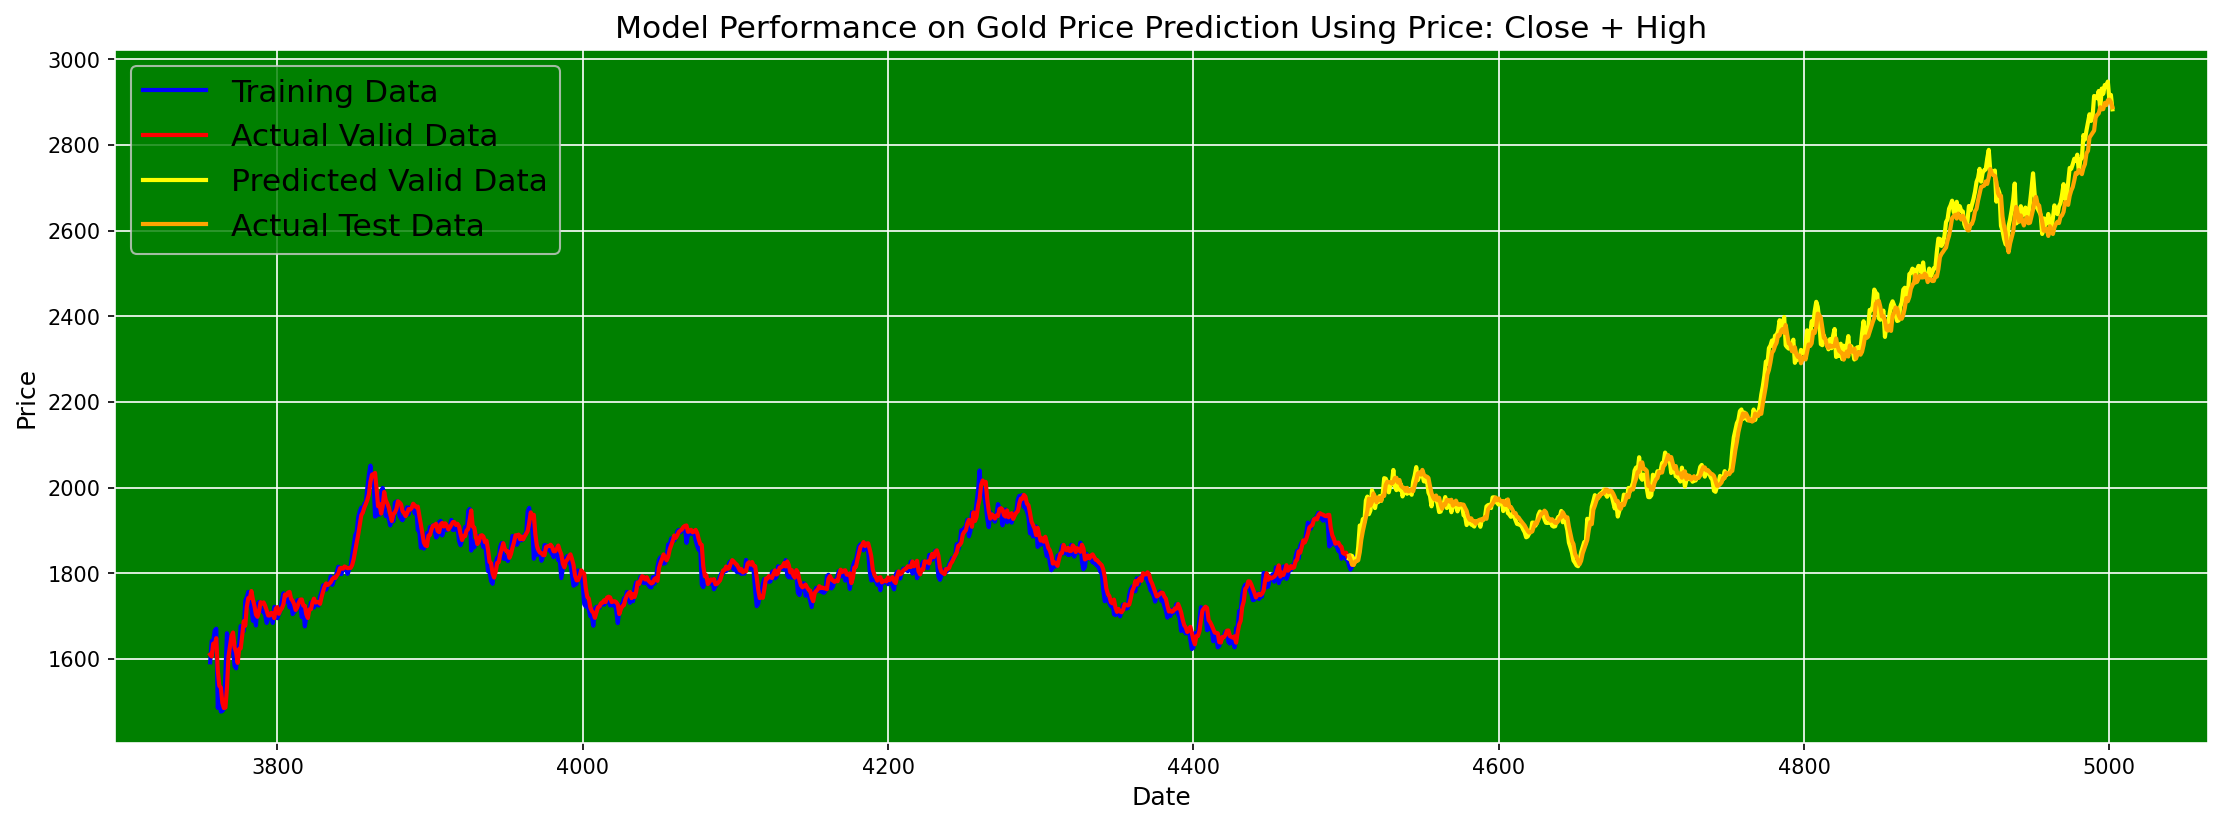

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Close + High', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Close + Volume**

In [ ]:
# Close
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
# Volume
scaler_Volume = MinMaxScaler()
scaler_Volume.fit(df.Volume.values.reshape(-1,1))
train_data_Volume = df['Volume'][:train_size]
train_data_Volume = scaler_Volume.transform(train_data_Volume.values.reshape(-1,1))

val_data_Volume = df['Volume'][train_size:train_size+val_size]
val_data_Volume = scaler_Volume.transform(val_data_Volume.values.reshape(-1,1))

test_data_Volume = df['Volume'][train_size+val_size:]
test_data_Volume = scaler_Volume.transform(test_data_Volume.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Volume[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Volume[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Volume[i:i+window])

  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Volume[i-window-window+len(x_val):i+len(x_val)-window])

  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Volume[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])

In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0615 - root_mean_squared_error: 0.2464 - val_loss: 0.0839 - val_root_mean_squared_error: 0.2896
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0053 - root_mean_squared_error: 0.0717 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1404
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0946
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.5661e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.2161e-05 - root_mean_squared_error: 0.0085 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0626
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.8188e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6934e-04 - root_mean_squared_error: 0.0187  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
CPU times: user 278 ms, sys: 14.7 ms, total: 292 ms
Wall time: 392 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.0014137986581772566
Test RMSE: 0.03760051354765892
Test MAPE: 0.03411626943267976
Test Accuracy: 0.9658837305673202


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


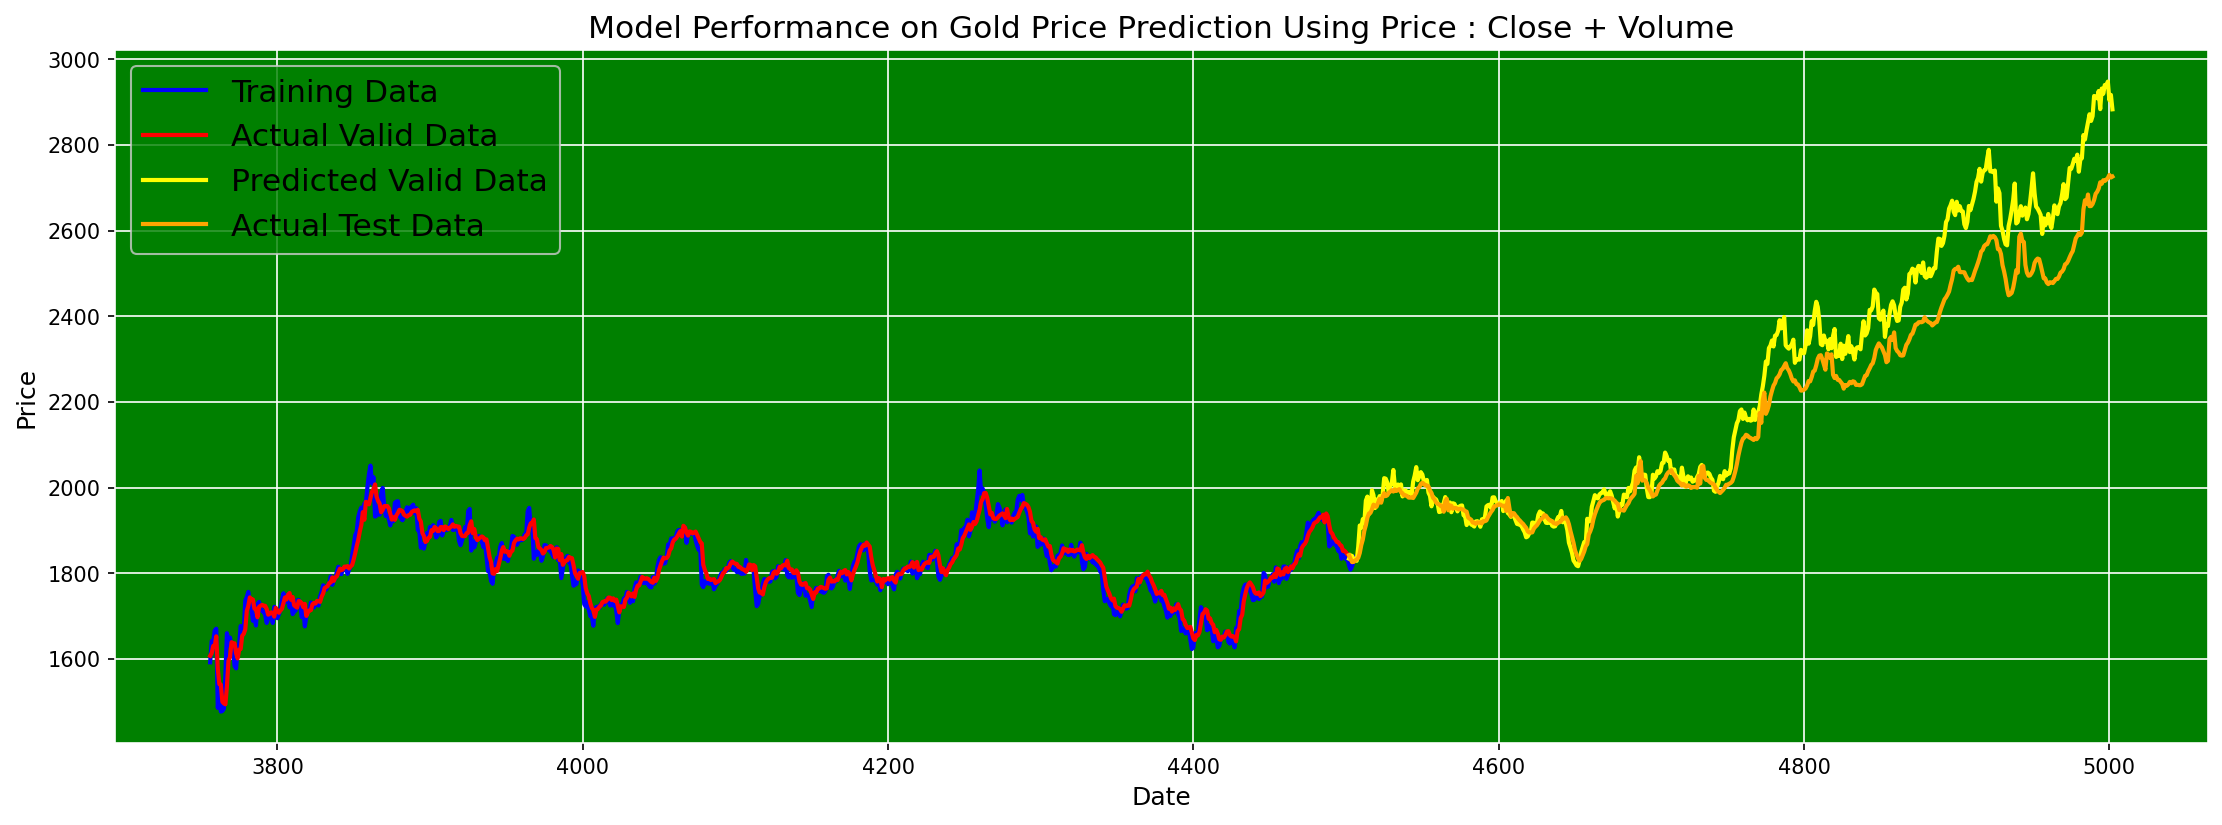

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price : Close + Volume', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**High + Low**

In [ ]:
# High
train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
# Low
scaler_Low = MinMaxScaler()
scaler_Low.fit(df.Low.values.reshape(-1,1))
train_data_Low = df['Low'][:train_size]
train_data_Low = scaler_Low.transform(train_data_Low.values.reshape(-1,1))

val_data_Low = df['Low'][train_size:train_size+val_size]
val_data_Low = scaler_Low.transform(val_data_Low.values.reshape(-1,1))

test_data_Low = df['Low'][train_size+val_size:]
test_data_Low = scaler_Low.transform(test_data_Low.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Low[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])


In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Low[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Low[i:i+window])

  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Low[i-window-window+len(x_val):i+len(x_val)-window])

  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Low[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0712 - root_mean_squared_error: 0.2639 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1101
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0784
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.8996e-04 - root_mean_squared_error: 0.0242 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0589
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7516e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3388e-04 - root_mean_squared_error: 0.0116 - val_loss: 9.8045e-04 - val_root_mean_squared_error: 0.0313
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1330e-05 - root_mean_squared_error: 0.0084 - val_loss: 6.2016e-04 - val_root_mean_squared_error: 0.0249
Epoch 7/50
118/118 ━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9902e-05 - root_mean_squared_error: 0.0077


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
CPU times: user 301 ms, sys: 5.68 ms, total: 307 ms
Wall time: 400 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 7.697614637436345e-05
Test RMSE: 0.008773605339229107
Test MAPE: 0.009246732237946614
Test Accuracy: 0.9907532677620534


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


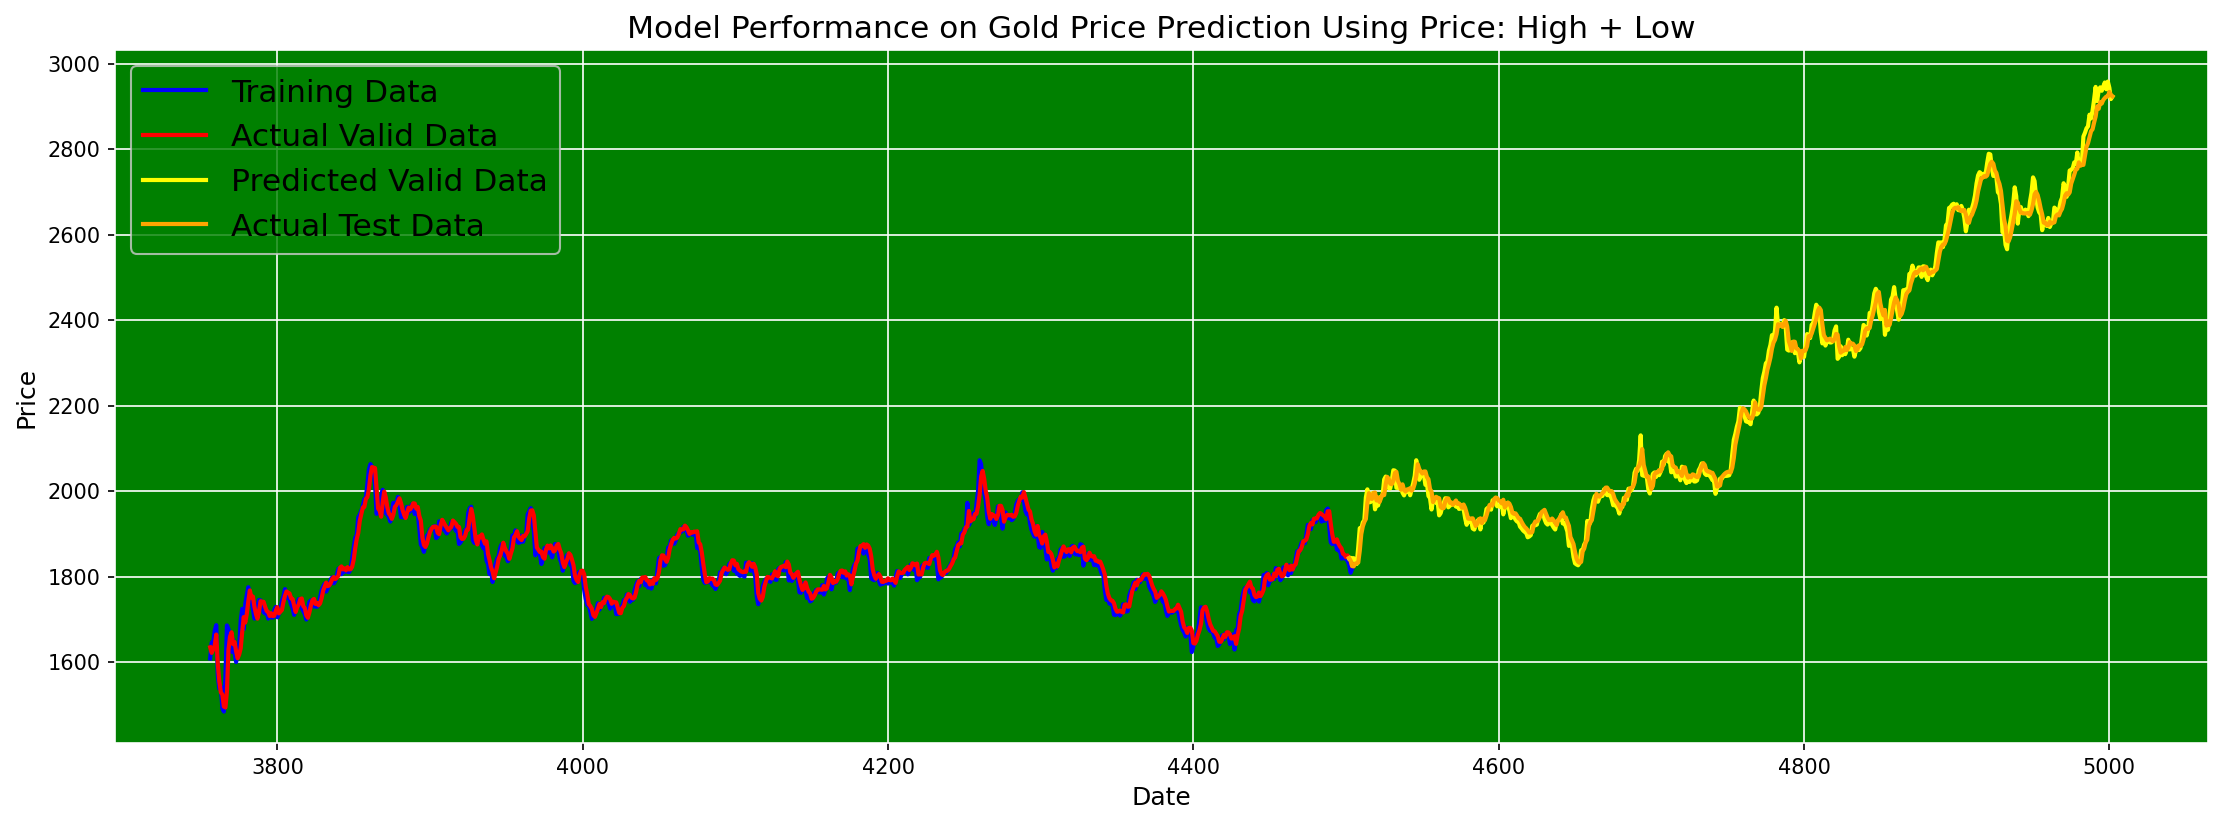

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: High + Low', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Close + Open**

In [ ]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
# Open
scaler_Open = MinMaxScaler()
scaler_Open.fit(df.Open.values.reshape(-1,1))
train_data_Open = df['Open'][:train_size]
train_data_Open = scaler_Open.transform(train_data_Open.values.reshape(-1,1))

val_data_Open = df['Open'][train_size:train_size+val_size]
val_data_Open = scaler_Open.transform(val_data_Open.values.reshape(-1,1))

test_data_Open = df['Open'][train_size+val_size:]
test_data_Open = scaler_Open.transform(test_data_Open.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Open[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])


In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Open[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Open[i:i+window])

  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Open[i-window-window+len(x_val):i+len(x_val)-window])

  x_test.append(temp)

  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Open[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0237 - root_mean_squared_error: 0.1462 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.2155e-04 - root_mean_squared_error: 0.0110 - val_loss: 8.9255e-04 - val_root_mean_squared_error: 0.0299
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2088e-05 - root_mean_squared_error: 0.0079 - val_loss: 6.4414e-04 - val_root_mean_squared_error: 0.0254
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5665e-05 - root_mean_squared_error: 0.0081 - val_loss: 6.3553e-04 - val_root_mean_squared_error: 0.0252
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.0654e-05 - root_mean_squared_error: 0.0078 - val_loss: 6.2399e-04 - val_root_mean_squared_error: 0.0250
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9103e-05 - root_mean_squared_error: 0.0077 - val_loss: 6.7703e-04 - val_root_mean_squared_error: 0.0260
Epoch 7/50

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1729e-05 - root_mean_squared_error: 0.0089  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
CPU times: user 286 ms, sys: 9.89 ms, total: 296 ms
Wall time: 426 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00014224235201254487
Test RMSE: 0.011926540173590183
Test MAPE: 0.012262068311717023
Test Accuracy: 0.9877379316882829


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


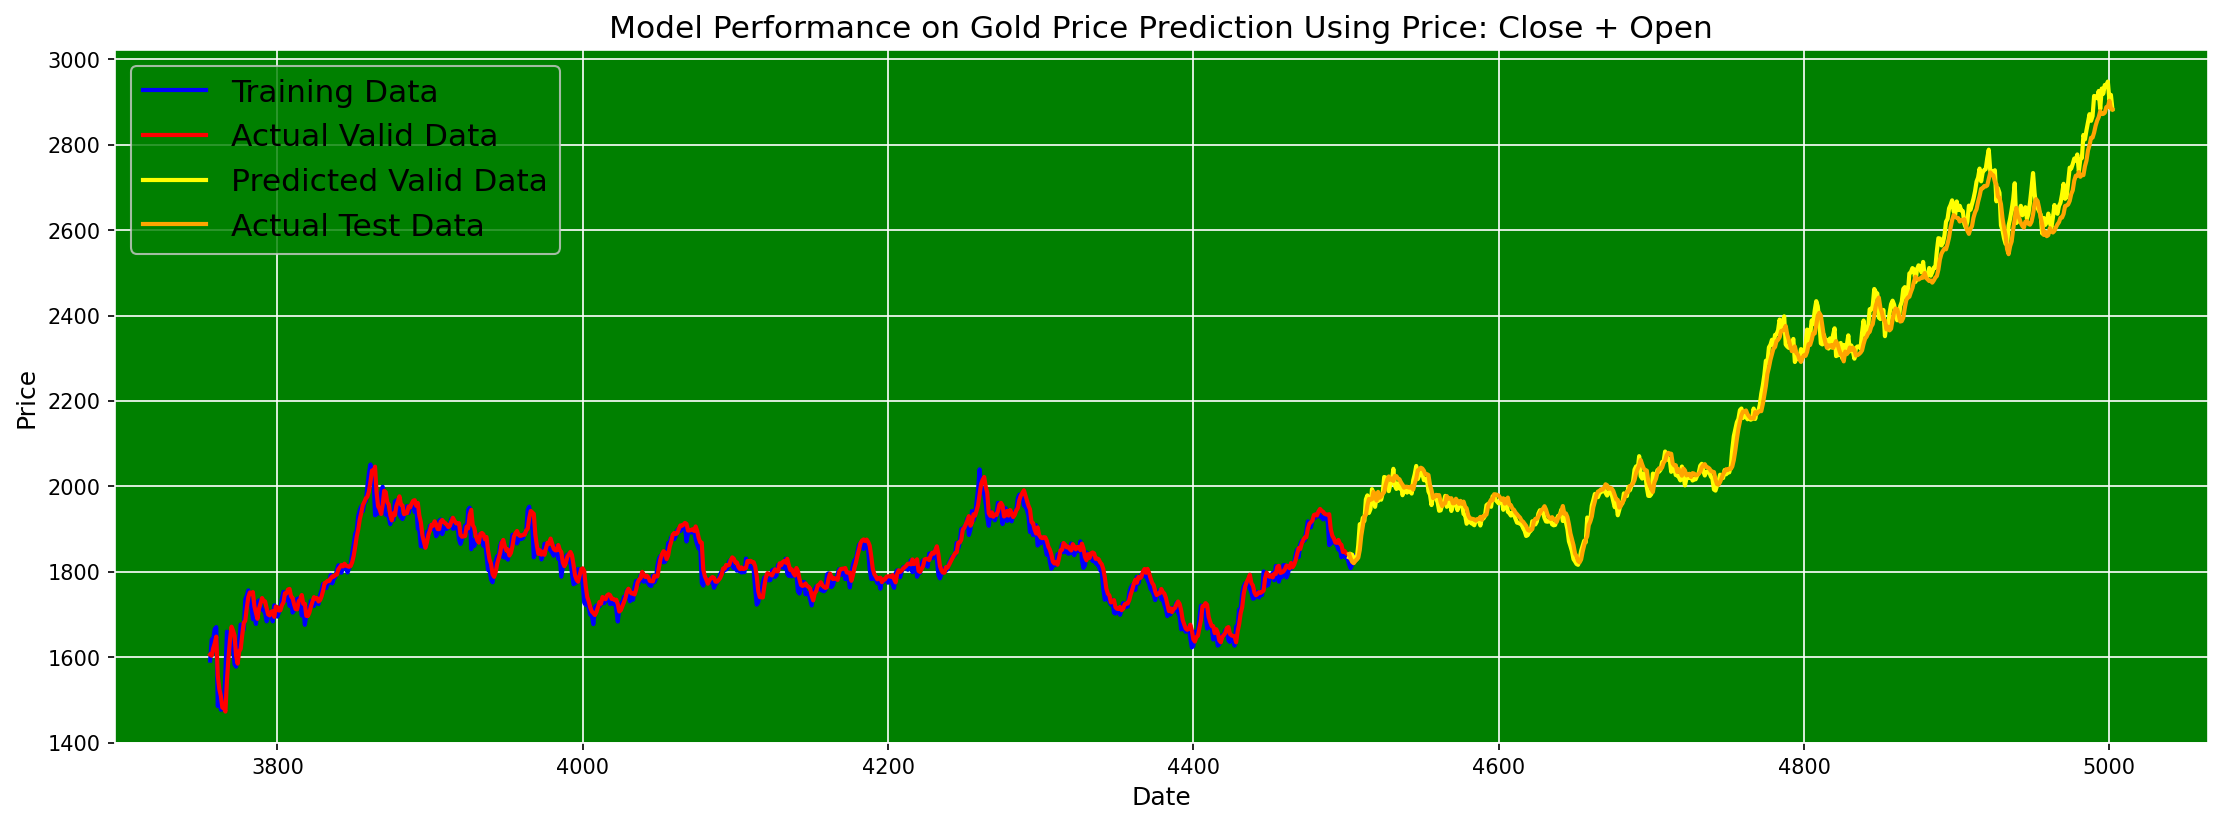

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Close + Open', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Close + Low**

In [ ]:
# Predicting gold price using Close value

train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
# Low
scaler_Low = MinMaxScaler()
scaler_Low.fit(df.Low.values.reshape(-1,1))
train_data_Low = df['Low'][:train_size]
train_data_Low = scaler_Low.transform(train_data_Low.values.reshape(-1,1))

val_data_Low = df['Low'][train_size:train_size+val_size]
val_data_Low = scaler_Low.transform(val_data_Low.values.reshape(-1,1))

test_data_Low = df['Low'][train_size+val_size:]
test_data_Low = scaler_Low.transform(test_data_Low.values.reshape(-1,1))

In [ ]:
# Volume
scaler_Volume = MinMaxScaler()
scaler_Volume.fit(df.Volume.values.reshape(-1,1))
train_data_Volume = df['Volume'][:train_size]
train_data_Volume = scaler_Volume.transform(train_data_Volume.values.reshape(-1,1))

val_data_Volume = df['Volume'][train_size:train_size+val_size]
val_data_Volume = scaler_Volume.transform(val_data_Volume.values.reshape(-1,1))

test_data_Volume = df['Volume'][train_size+val_size:]
test_data_Volume = scaler_Volume.transform(test_data_Volume.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Low[i:i+window])
  temp = np.append(temp, train_data_Volume[i:i+window])

  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Low[i+3751-window:i+3751])
  temp = np.append(temp, train_data_Volume[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Low[i:i+window])
  temp = np.append(temp, val_data_Volume[i:i+window])

  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Low[i-window-window+len(x_val):i+len(x_val)-window])
  temp = np.append(temp, val_data_Volume[i-window-window+len(x_val):i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Low[i:i+window])
  temp = np.append(temp, test_data_Volume[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 15, 1), (3751, 1), (751, 15, 1), (751, 1), (501, 15, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │         7,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0611 - root_mean_squared_error: 0.2408 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1877e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.8652e-05 - root_mean_squared_error: 0.0094 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.6925e-05 - root_mean_squared_error: 0.0088 - val_loss: 9.8728e-04 - val_root_mean_squared_error: 0.0314
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.1478e-05 - root_mean_squared_error: 0.0085 - val_loss: 7.9146e-04 - val_root_mean_squared_error: 0.0281
Epoch 7/50
118/118 ━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2787e-05 - root_mean_squared_error: 0.0094  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
CPU times: user 274 ms, sys: 14.3 ms, total: 289 ms
Wall time: 396 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00019012736447621137
Test RMSE: 0.013788668438792229
Test MAPE: 0.013198198520713553
Test Accuracy: 0.9868018014792864


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


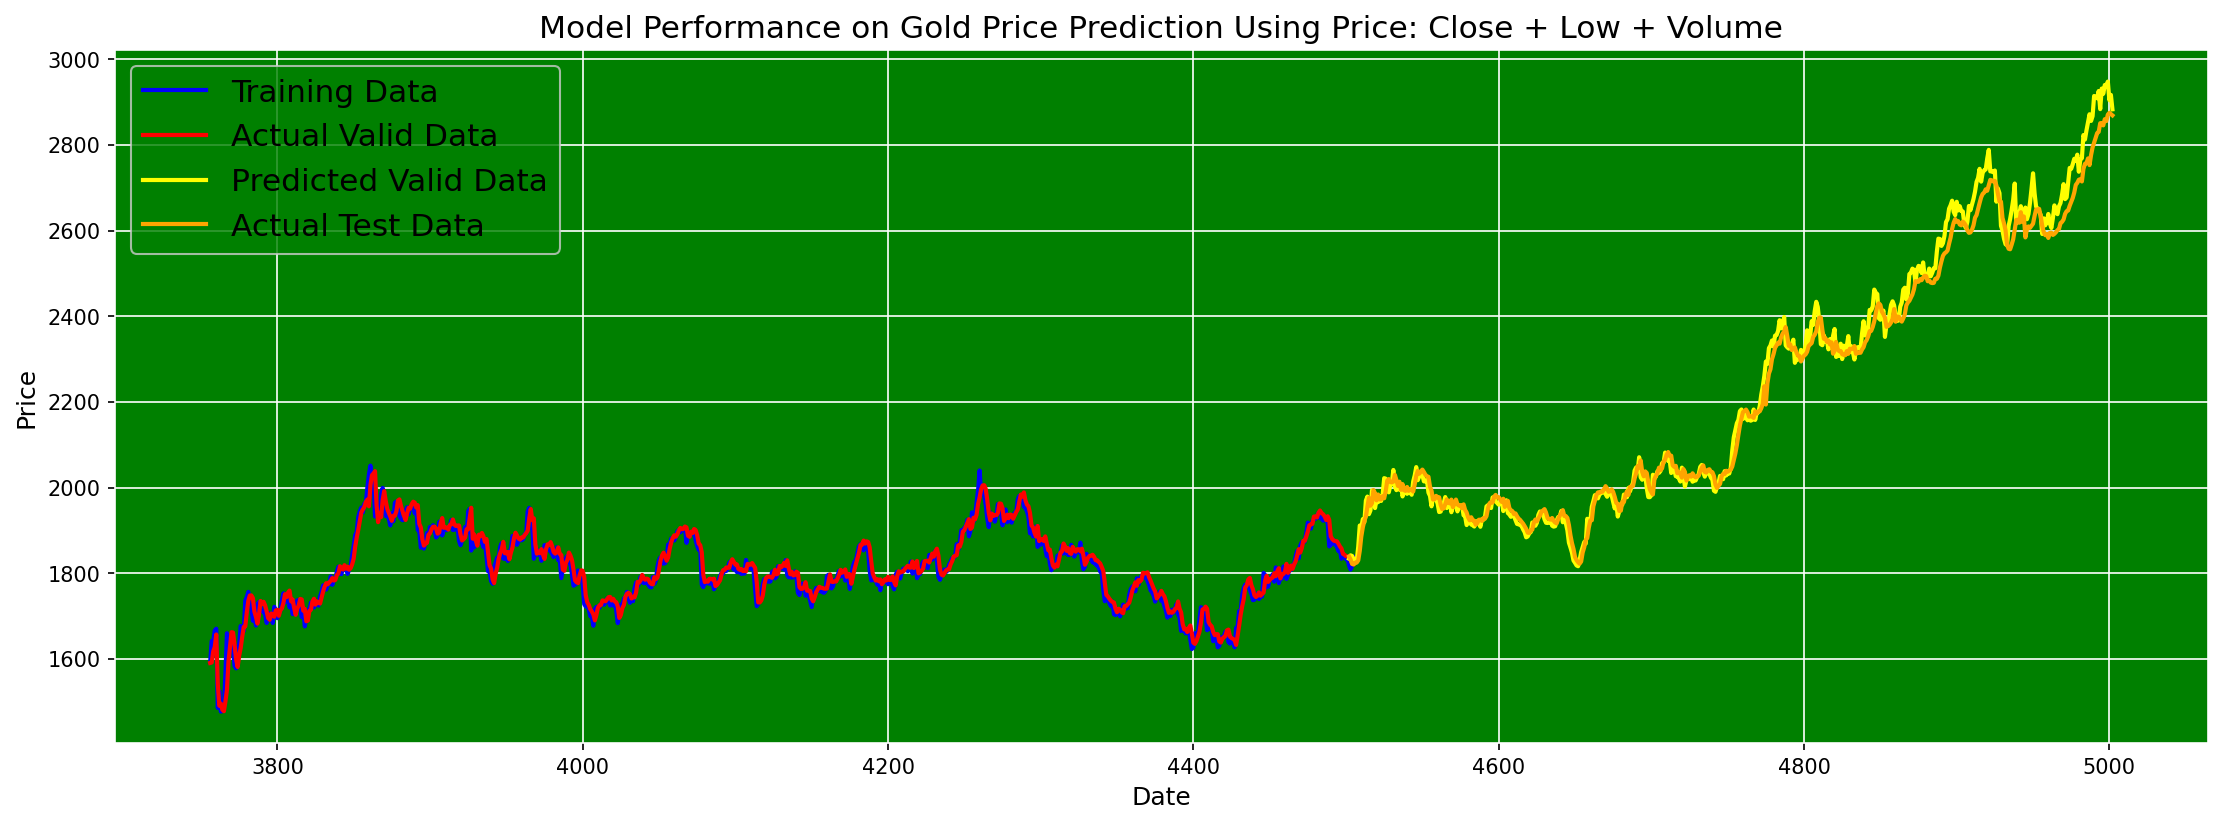

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Close + Low + Volume', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**High + Open + Volume**

In [ ]:
train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
# Open
scaler_Open = MinMaxScaler()
scaler_Open.fit(df.Open.values.reshape(-1,1))
train_data_Open = df['Open'][:train_size]
train_data_Open = scaler_Open.transform(train_data_Open.values.reshape(-1,1))

val_data_Open = df['Open'][train_size:train_size+val_size]
val_data_Open = scaler_Open.transform(val_data_Open.values.reshape(-1,1))

test_data_Open = df['Open'][train_size+val_size:]
test_data_Open = scaler_Open.transform(test_data_Open.values.reshape(-1,1))

In [ ]:
# Volume
scaler_Volume = MinMaxScaler()
scaler_Volume.fit(df.Volume.values.reshape(-1,1))
train_data_Volume = df['Volume'][:train_size]
train_data_Volume = scaler_Volume.transform(train_data_Volume.values.reshape(-1,1))

val_data_Volume = df['Volume'][train_size:train_size+val_size]
val_data_Volume = scaler_Volume.transform(val_data_Volume.values.reshape(-1,1))

test_data_Volume = df['Volume'][train_size+val_size:]
test_data_Volume = scaler_Volume.transform(test_data_Volume.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Open[i:i+window])
  temp = np.append(temp, train_data_Volume[i:i+window])

  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Open[i+3751-window:i+3751])
  temp = np.append(temp, train_data_Volume[i+3751-window:i+3751])

  x_val.append(temp)

  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Open[i:i+window])
  temp = np.append(temp, val_data_Volume[i:i+window])

  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Open[i-window-window+len(x_val):i+len(x_val)-window])
  temp = np.append(temp, val_data_Volume[i-window-window+len(x_val):i+len(x_val)-window])

  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Open[i:i+window])
  temp = np.append(temp, test_data_Volume[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 15, 1), (3751, 1), (751, 15, 1), (751, 1), (501, 15, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │         7,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0161 - root_mean_squared_error: 0.1170 - val_loss: 7.6346e-04 - val_root_mean_squared_error: 0.0276
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2637e-05 - root_mean_squared_error: 0.0096 - val_loss: 4.5114e-04 - val_root_mean_squared_error: 0.0212
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6003e-05 - root_mean_squared_error: 0.0075 - val_loss: 3.2807e-04 - val_root_mean_squared_error: 0.0181
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.4034e-05 - root_mean_squared_error: 0.0073 - val_loss: 2.0621e-04 - val_root_mean_squared_error: 0.0144
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0206e-05 - root_mean_squared_error: 0.0071 - val_loss: 1.8201e-04 - val_root_mean_squared_error: 0.0135
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4453e-05 - root_mean_squared_error: 0.0067 - val_loss: 1.2457e-04 - val_root_mean_squared_error: 0.0112
Epoch 7/

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7331e-05 - root_mean_squared_error: 0.0075  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 236 ms, sys: 6.1 ms, total: 242 ms
Wall time: 367 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 6.471882079495117e-05
Test RMSE: 0.008044800721108913
Test MAPE: 0.008459445403174401
Test Accuracy: 0.9915405545968256


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


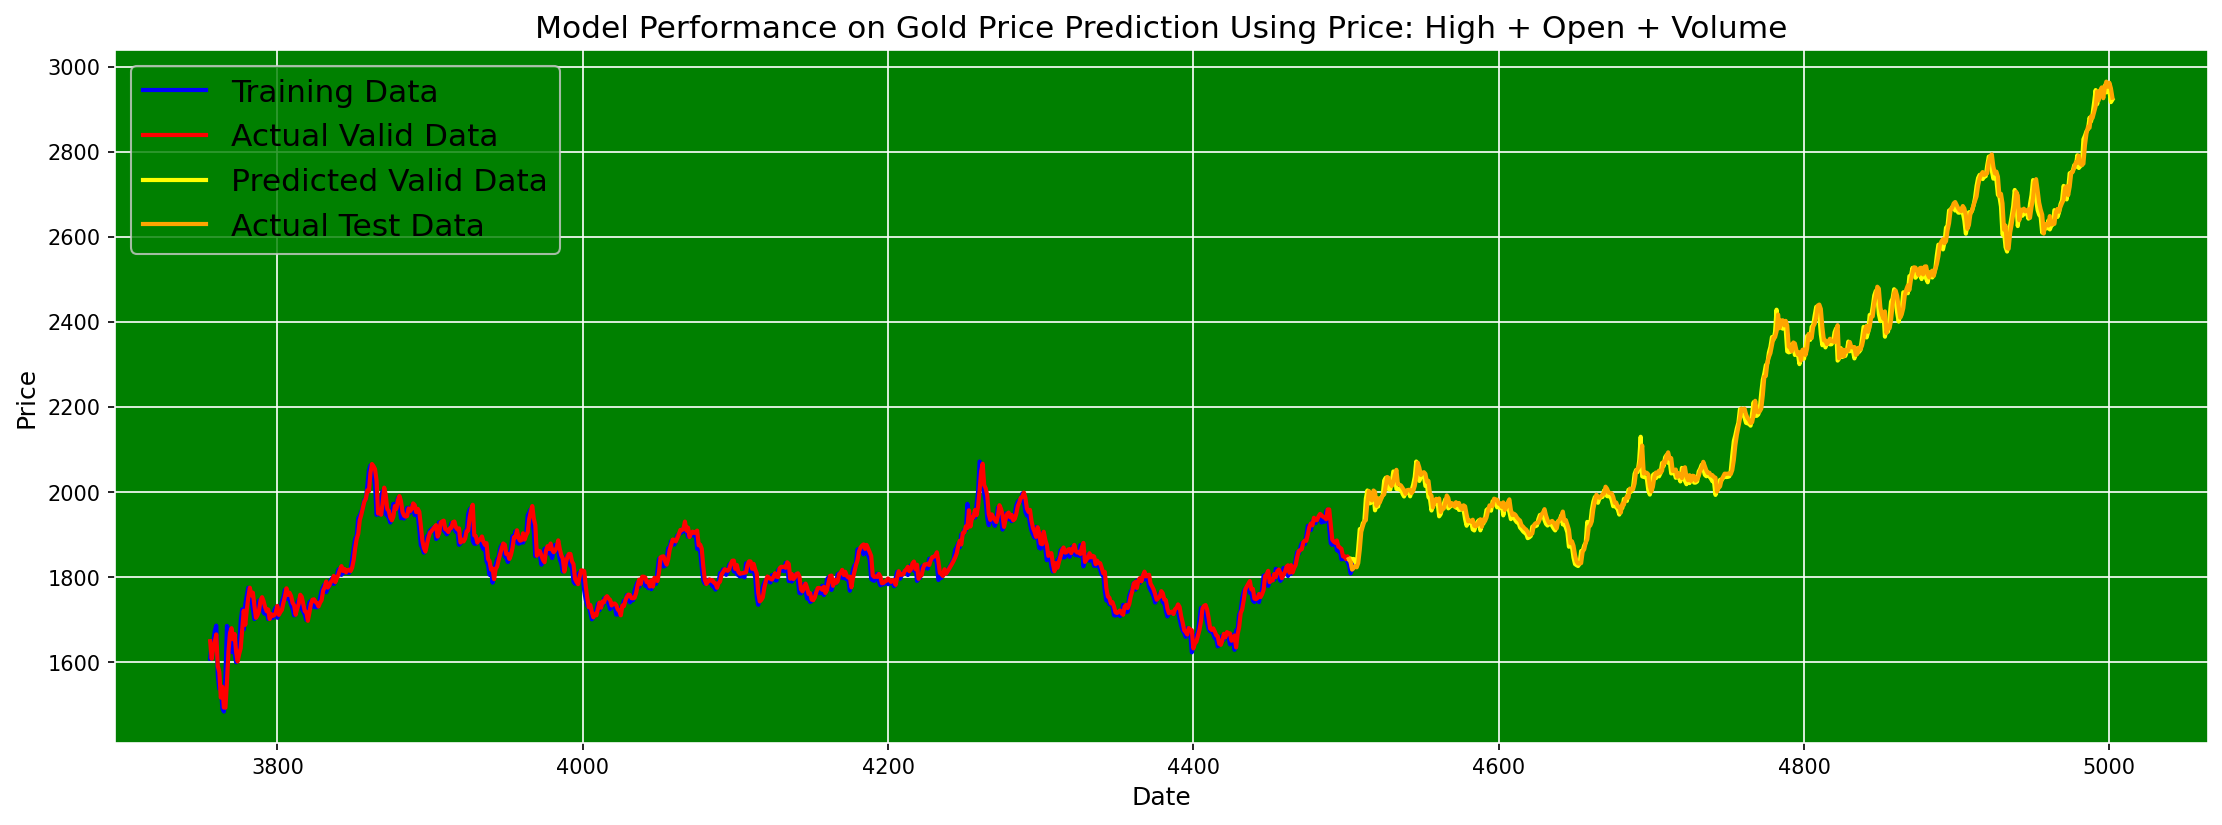

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: High + Open + Volume', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**High + Volume**

In [ ]:
# Predicting gold price using High value

train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
# Volume
scaler_Volume = MinMaxScaler()
scaler_Volume.fit(df.Volume.values.reshape(-1,1))
train_data_Volume = df['Volume'][:train_size]
train_data_Volume = scaler_Volume.transform(train_data_Volume.values.reshape(-1,1))

val_data_Volume = df['Volume'][train_size:train_size+val_size]
val_data_Volume = scaler_Volume.transform(val_data_Volume.values.reshape(-1,1))

test_data_Volume = df['Volume'][train_size+val_size:]
test_data_Volume = scaler_Volume.transform(test_data_Volume.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Volume[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])


In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Volume[i+3751-window:i+3751])
  x_val.append(temp)

  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Volume[i:i+window])
  x_val.append(temp)

  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Volume[i-window-window+len(x_val):i+len(x_val)-window])
  x_test.append(temp)

  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Volume[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1041 - root_mean_squared_error: 0.3223 - val_loss: 0.4061 - val_root_mean_squared_error: 0.6373
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0640 - root_mean_squared_error: 0.2529 - val_loss: 0.2610 - val_root_mean_squared_error: 0.5108
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0320 - root_mean_squared_error: 0.1785 - val_loss: 0.1291 - val_root_mean_squared_error: 0.3594
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0102 - root_mean_squared_error: 0.1008 - val_loss: 0.0622 - val_root_mean_squared_error: 0.2494
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1986
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - root_mean_squared_error: 0.0456 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - root_mean_squared_error: 0.0348      


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
CPU times: user 240 ms, sys: 16.1 ms, total: 256 ms
Wall time: 363 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.004511817824095488
Test RMSE: 0.06717006862163544
Test MAPE: 0.0648873635012572
Test Accuracy: 0.9351126364987428


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


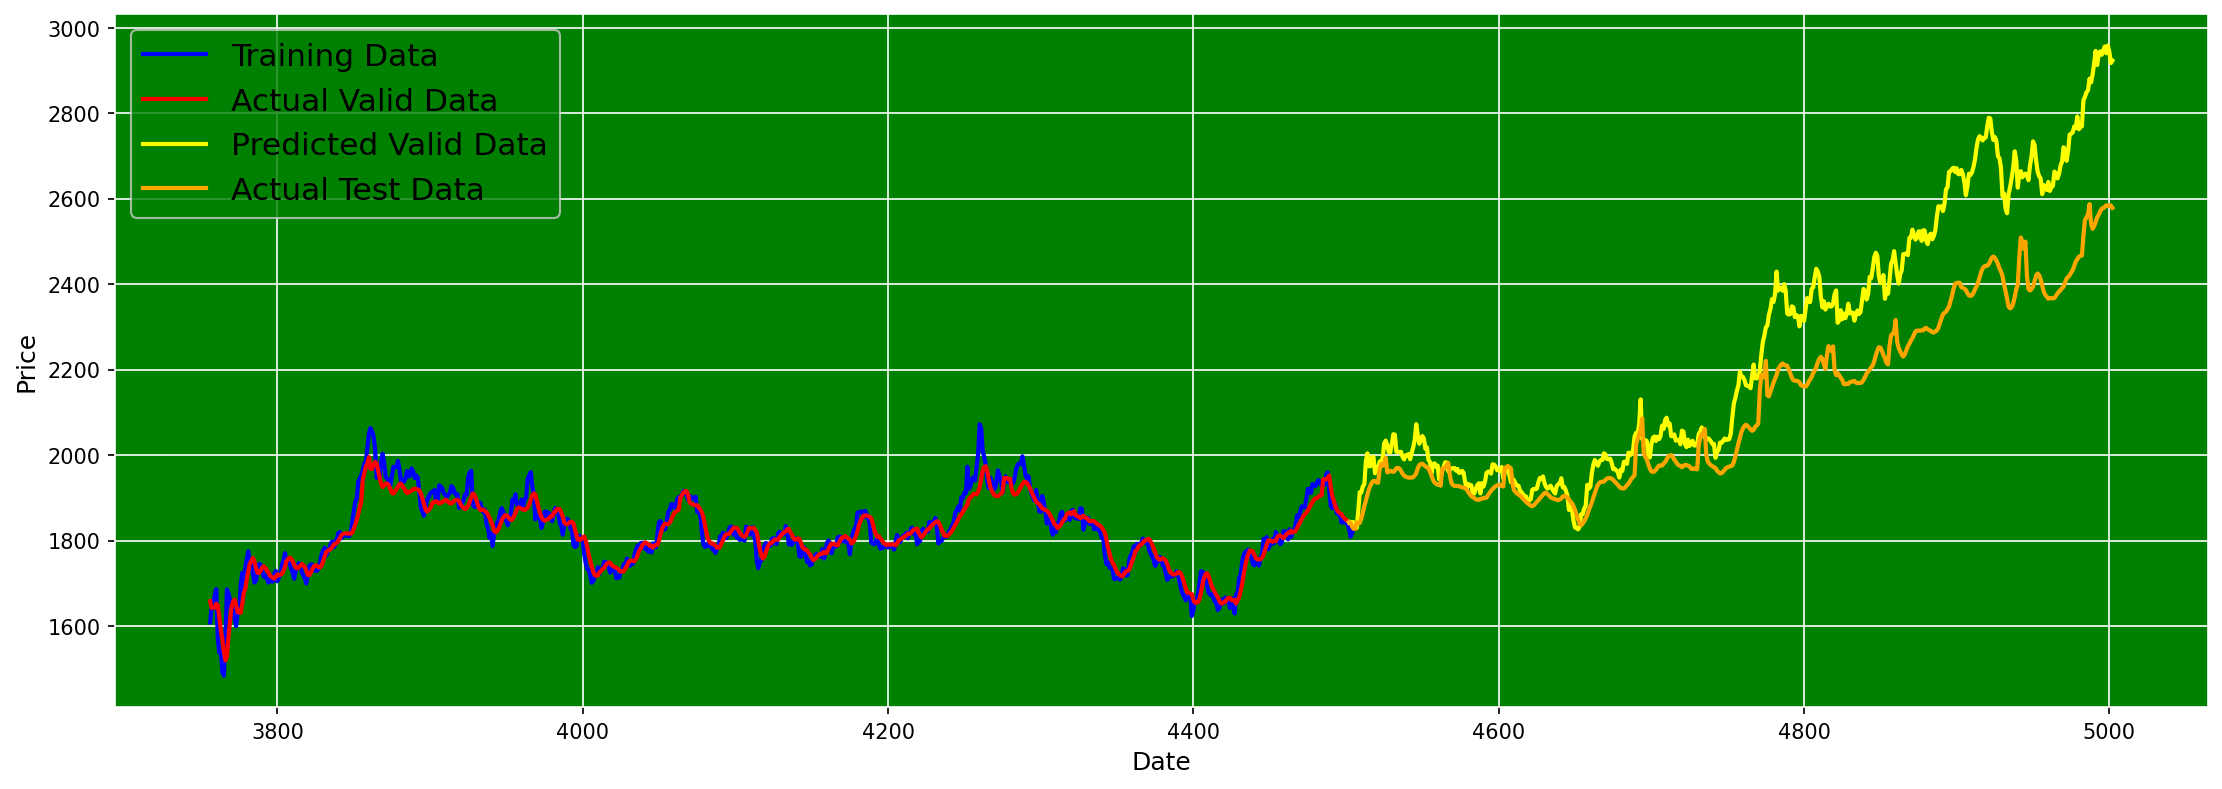

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
# plt.title('Model Performance on Gold Price Prediction Using Price: High + Volume', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**High + Low + Open**

In [ ]:
# Predicting gold price using High value

train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
# Low
scaler_Low = MinMaxScaler()
scaler_Low.fit(df.Low.values.reshape(-1,1))
train_data_Low = df['Low'][:train_size]
train_data_Low = scaler_Low.transform(train_data_Low.values.reshape(-1,1))

val_data_Low = df['Low'][train_size:train_size+val_size]
val_data_Low = scaler_Low.transform(val_data_Low.values.reshape(-1,1))

test_data_Low = df['Low'][train_size+val_size:]
test_data_Low = scaler_Low.transform(test_data_Low.values.reshape(-1,1))

In [ ]:
# Open
scaler_Open = MinMaxScaler()
scaler_Open.fit(df.Open.values.reshape(-1,1))
train_data_Open = df['Open'][:train_size]
train_data_Open = scaler_Open.transform(train_data_Open.values.reshape(-1,1))

val_data_Open = df['Open'][train_size:train_size+val_size]
val_data_Open = scaler_Open.transform(val_data_Open.values.reshape(-1,1))

test_data_Open = df['Open'][train_size+val_size:]
test_data_Open = scaler_Open.transform(test_data_Open.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Low[i:i+window])
  temp = np.append(temp, train_data_Open[i:i+window])

  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Low[i+3751-window:i+3751])
  temp = np.append(temp, train_data_Open[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Low[i:i+window])
  temp = np.append(temp, val_data_Open[i:i+window])

  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Low[i-window-window+len(x_val):i+len(x_val)-window])
  temp = np.append(temp, val_data_Open[i-window-window+len(x_val):i+len(x_val)-window])

  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Low[i:i+window])
  temp = np.append(temp, test_data_Open[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 15, 1), (3751, 1), (751, 15, 1), (751, 1), (501, 15, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │         7,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191 - root_mean_squared_error: 0.1293 - val_loss: 9.1918e-04 - val_root_mean_squared_error: 0.0303
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3669e-04 - root_mean_squared_error: 0.0117 - val_loss: 3.2266e-04 - val_root_mean_squared_error: 0.0180
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3189e-05 - root_mean_squared_error: 0.0086 - val_loss: 1.6719e-04 - val_root_mean_squared_error: 0.0129
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.8255e-05 - root_mean_squared_error: 0.0083 - val_loss: 1.7811e-04 - val_root_mean_squared_error: 0.0133
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6466e-05 - root_mean_squared_error: 0.0082 - val_loss: 1.6365e-04 - val_root_mean_squared_error: 0.0128
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4186e-05 - root_mean_squared_error: 0.0080 - val_loss: 1.5018e-04 - val_root_mean_squared_error: 0.0123
Epoch 7/

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0719e-05 - root_mean_squared_error: 0.0071  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CPU times: user 195 ms, sys: 7.98 ms, total: 203 ms
Wall time: 198 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 5.3767140343552455e-05
Test RMSE: 0.007332608103752136
Test MAPE: 0.007963085616280322
Test Accuracy: 0.9920369143837197


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


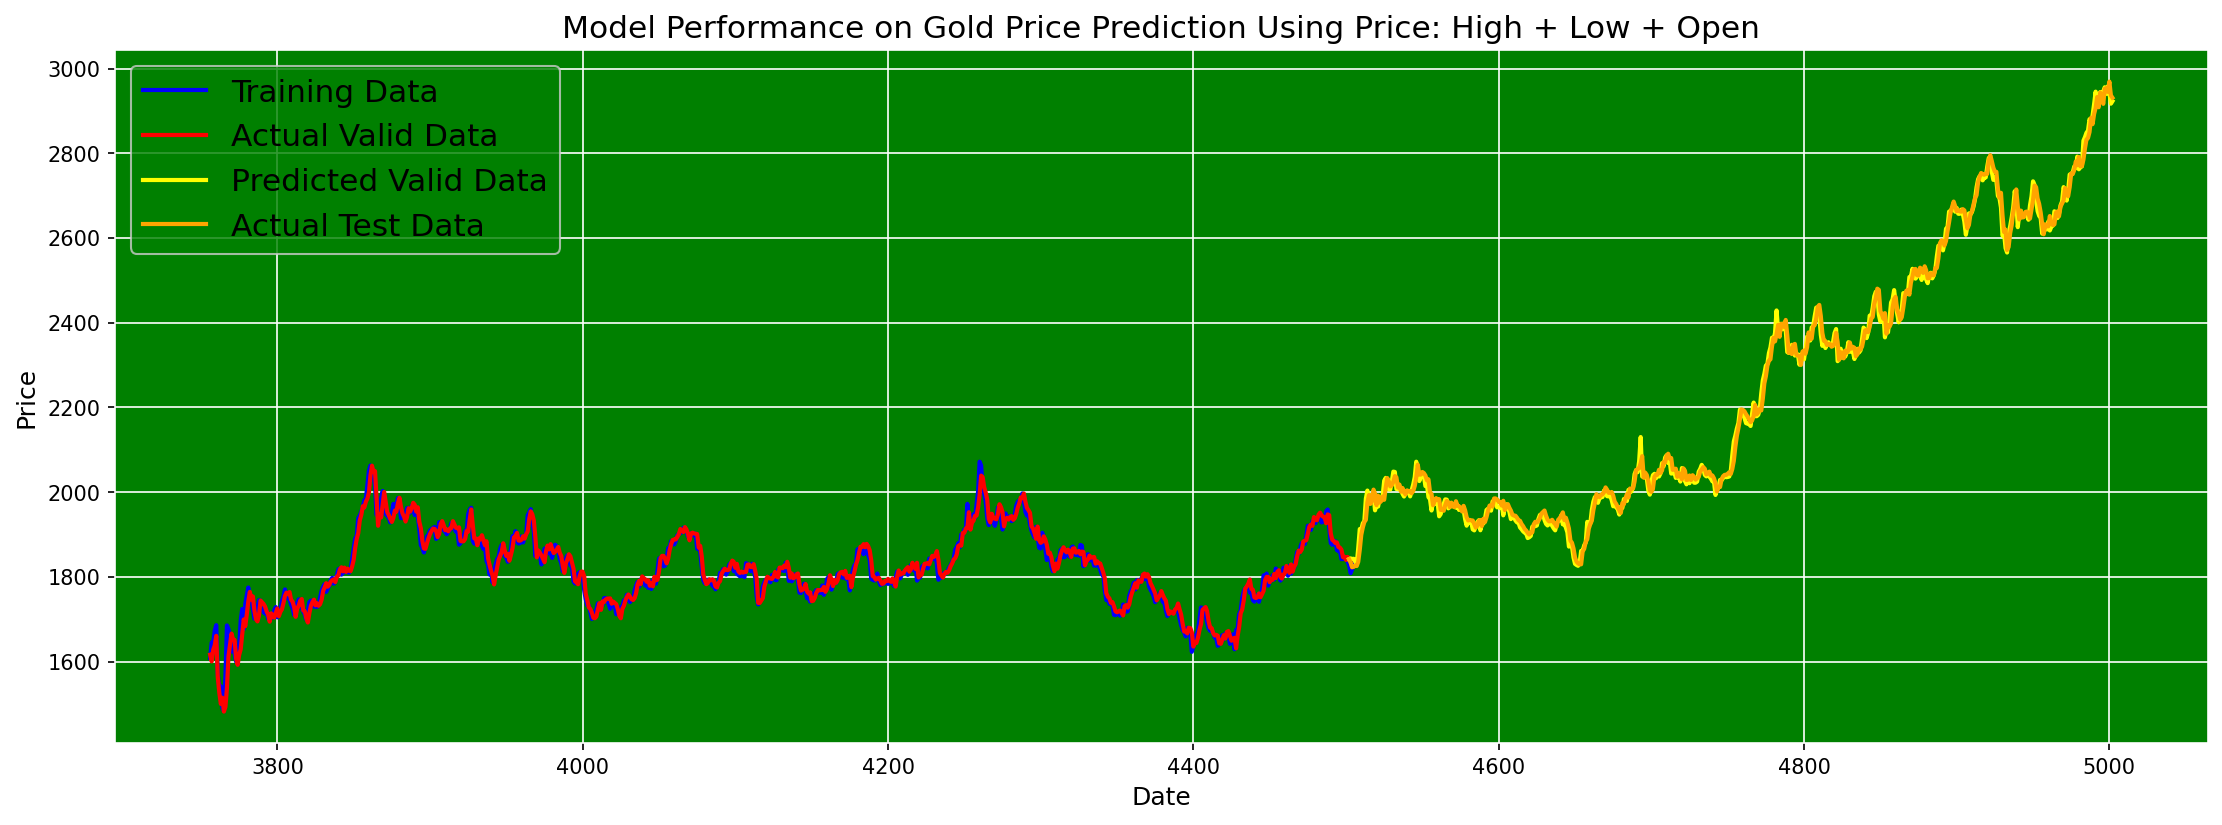

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: High + Low + Open', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**High + Low + Close**

In [ ]:
# Predicting gold price using High value

train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
# Low
scaler_Low = MinMaxScaler()
scaler_Low.fit(df.Low.values.reshape(-1,1))
train_data_Low = df['Low'][:train_size]
train_data_Low = scaler_Low.transform(train_data_Low.values.reshape(-1,1))

val_data_Low = df['Low'][train_size:train_size+val_size]
val_data_Low = scaler_Low.transform(val_data_Low.values.reshape(-1,1))

test_data_Low = df['Low'][train_size+val_size:]
test_data_Low = scaler_Low.transform(test_data_Low.values.reshape(-1,1))

In [ ]:
# Close
scaler_Close = MinMaxScaler()
scaler_Close.fit(df.Close.values.reshape(-1,1))
train_data_Close = df['Close'][:train_size]
train_data_Close = scaler_Close.transform(train_data_Close.values.reshape(-1,1))

val_data_Close = df['Close'][train_size:train_size+val_size]
val_data_Close = scaler_Close.transform(val_data_Close.values.reshape(-1,1))

test_data_Close = df['Close'][train_size+val_size:]
test_data_Close = scaler_Close.transform(test_data_Close.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Low[i:i+window])
  temp = np.append(temp, train_data_Close[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])


In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Low[i+3751-window:i+3751])
  temp = np.append(temp, train_data_Close[i+3751-window:i+3751])
  x_val.append(temp)

  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Low[i:i+window])
  temp = np.append(temp, val_data_Close[i:i+window])
  x_val.append(temp)

  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Low[i-window-window+len(x_val):i+len(x_val)-window])
  temp = np.append(temp, val_data_Close[i-window-window+len(x_val):i+len(x_val)-window])
  x_test.append(temp)

  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Low[i:i+window])
  temp = np.append(temp, test_data_Close[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 15, 1), (3751, 1), (751, 15, 1), (751, 1), (501, 15, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │         7,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0625 - root_mean_squared_error: 0.2466 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1517
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.9273e-04 - root_mean_squared_error: 0.0256 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5924e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4730e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6628e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0406
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3422e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0381
Epoch 7/50
118/118 ━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7588e-05 - root_mean_squared_error: 0.0094  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 209 ms, sys: 5.92 ms, total: 214 ms
Wall time: 362 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00024320663942489773
Test RMSE: 0.015595084056258202
Test MAPE: 0.013830663425121584
Test Accuracy: 0.9861693365748784


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


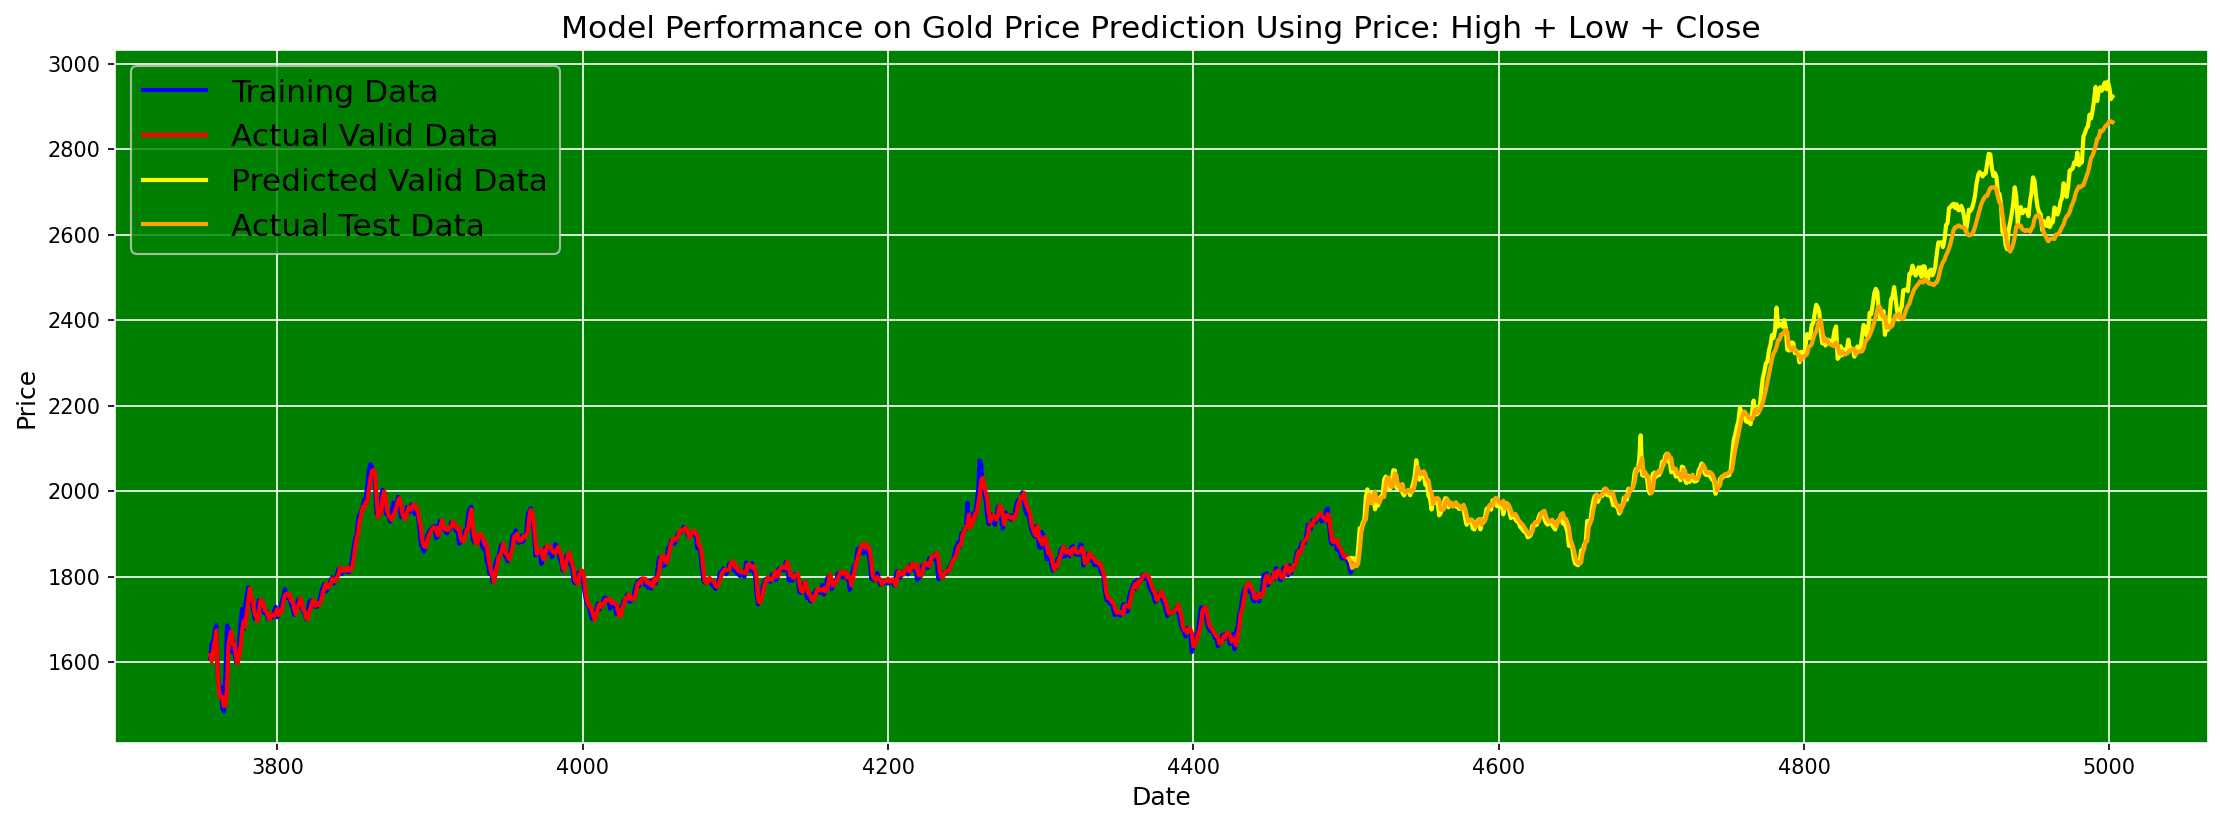

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: High + Low + Close', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

 **Price +Indicators**

In [ ]:
# RSI/SMA10/SMA20

**Close + SMA10**

In [ ]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_sma10[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_sma10[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_sma10[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [ ]:
model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1301 - root_mean_squared_error: 0.3573 - val_loss: 0.2266 - val_root_mean_squared_error: 0.4760
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0281 - root_mean_squared_error: 0.1668 - val_loss: 0.0672 - val_root_mean_squared_error: 0.2593
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049 - root_mean_squared_error: 0.0697 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1398
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1099
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - root_mean_squared_error: 0.0366 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9188e-05 - root_mean_squared_error: 0.0083  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 213 ms, sys: 9.06 ms, total: 222 ms
Wall time: 212 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 8.809378778096288e-05
Test RMSE: 0.009385828860104084
Test MAPE: 0.009978688147395132
Test Accuracy: 0.9900213118526049


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


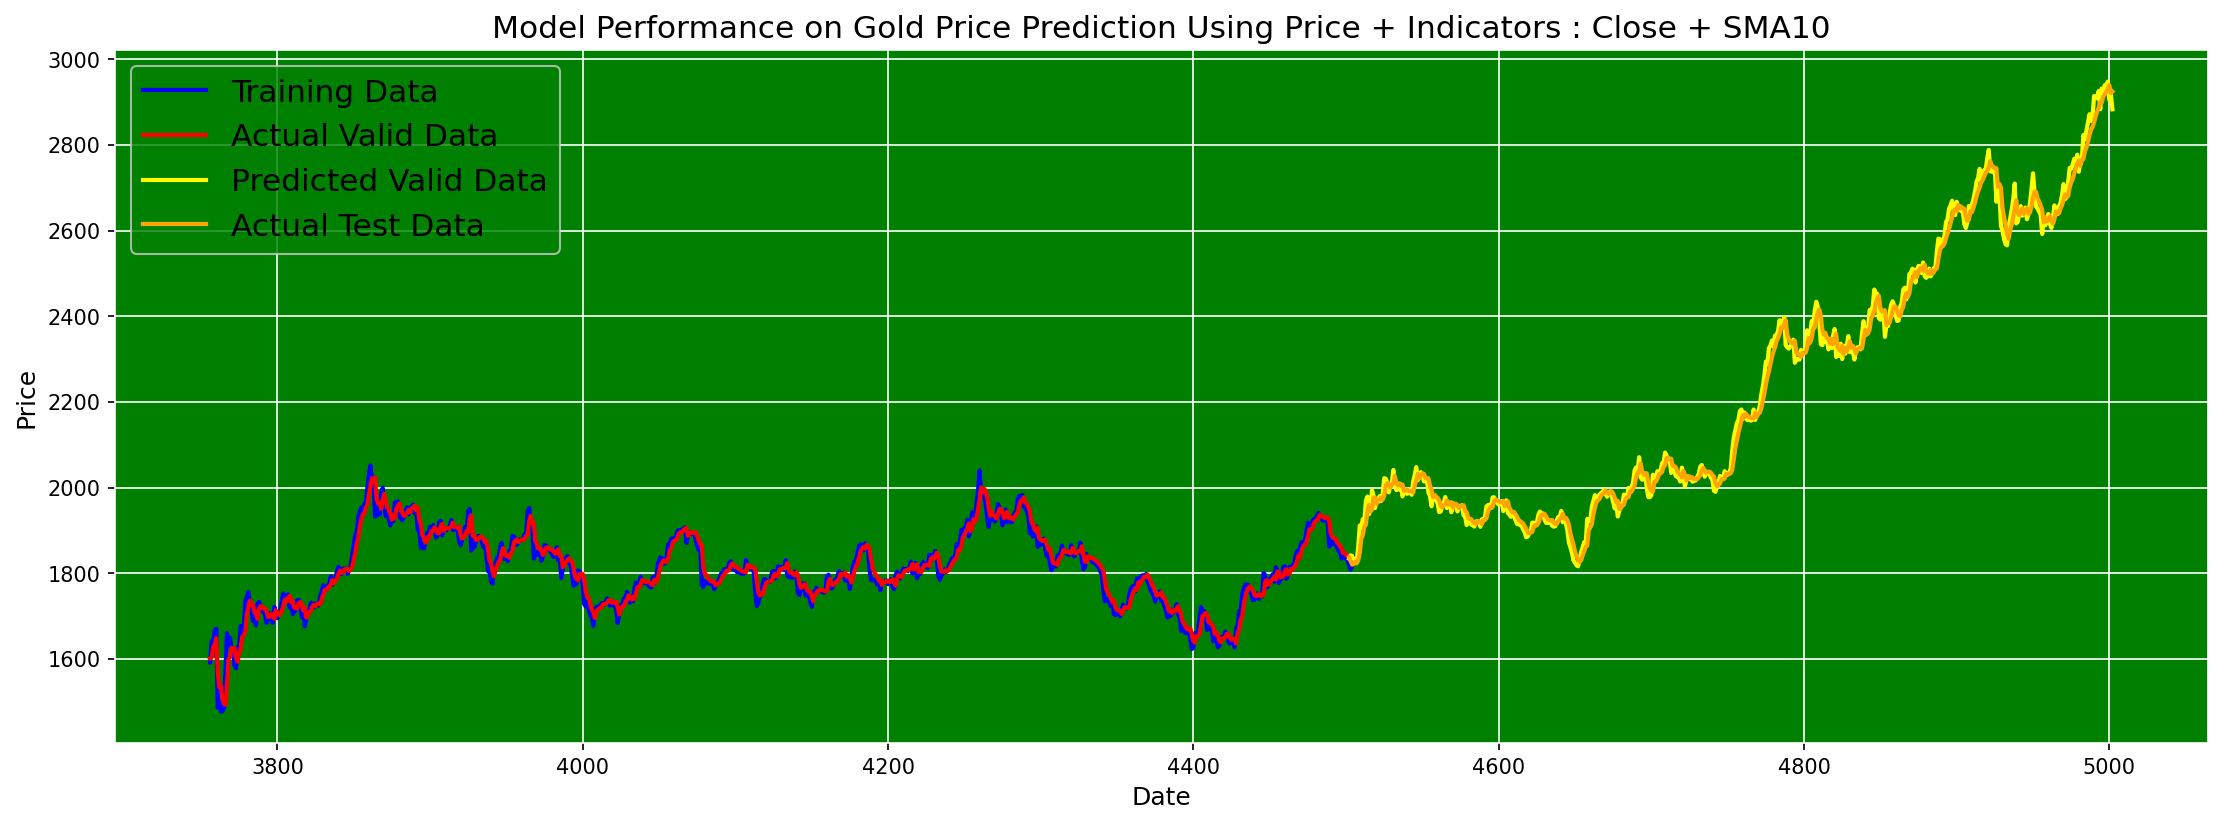

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price + Indicators : Close + SMA10', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**# Close + RSI + SMA10**

In [ ]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_rsi[i:i+window])
  temp = np.append(temp, train_data_sma10[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_rsi[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_rsi[i:i+window])
  temp = np.append(temp, val_data_sma10[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_rsi[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])

  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_rsi[i:i+window])
  temp = np.append(temp, test_data_sma10[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 15, 1), (3751, 1), (751, 15, 1), (751, 1), (501, 15, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │         7,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 12.2780 - root_mean_squared_error: 3.1646 - val_loss: 0.2692 - val_root_mean_squared_error: 0.5189
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1575 - root_mean_squared_error: 0.3968 - val_loss: 0.1909 - val_root_mean_squared_error: 0.4370
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1165 - root_mean_squared_error: 0.3412 - val_loss: 0.1495 - val_root_mean_squared_error: 0.3867
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0818 - root_mean_squared_error: 0.2860 - val_loss: 0.0970 - val_root_mean_squared_error: 0.3114
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0551 - root_mean_squared_error: 0.2346 - val_loss: 0.0810 - val_root_mean_squared_error: 0.2847
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0341 - root_mean_squared_error: 0.1844 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1973
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3002e-05 - root_mean_squared_error: 0.0085  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 211 ms, sys: 3.93 ms, total: 215 ms
Wall time: 209 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 9.252748714061454e-05
Test RMSE: 0.009619120508432388
Test MAPE: 0.010093231512562674
Test Accuracy: 0.9899067684874373


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


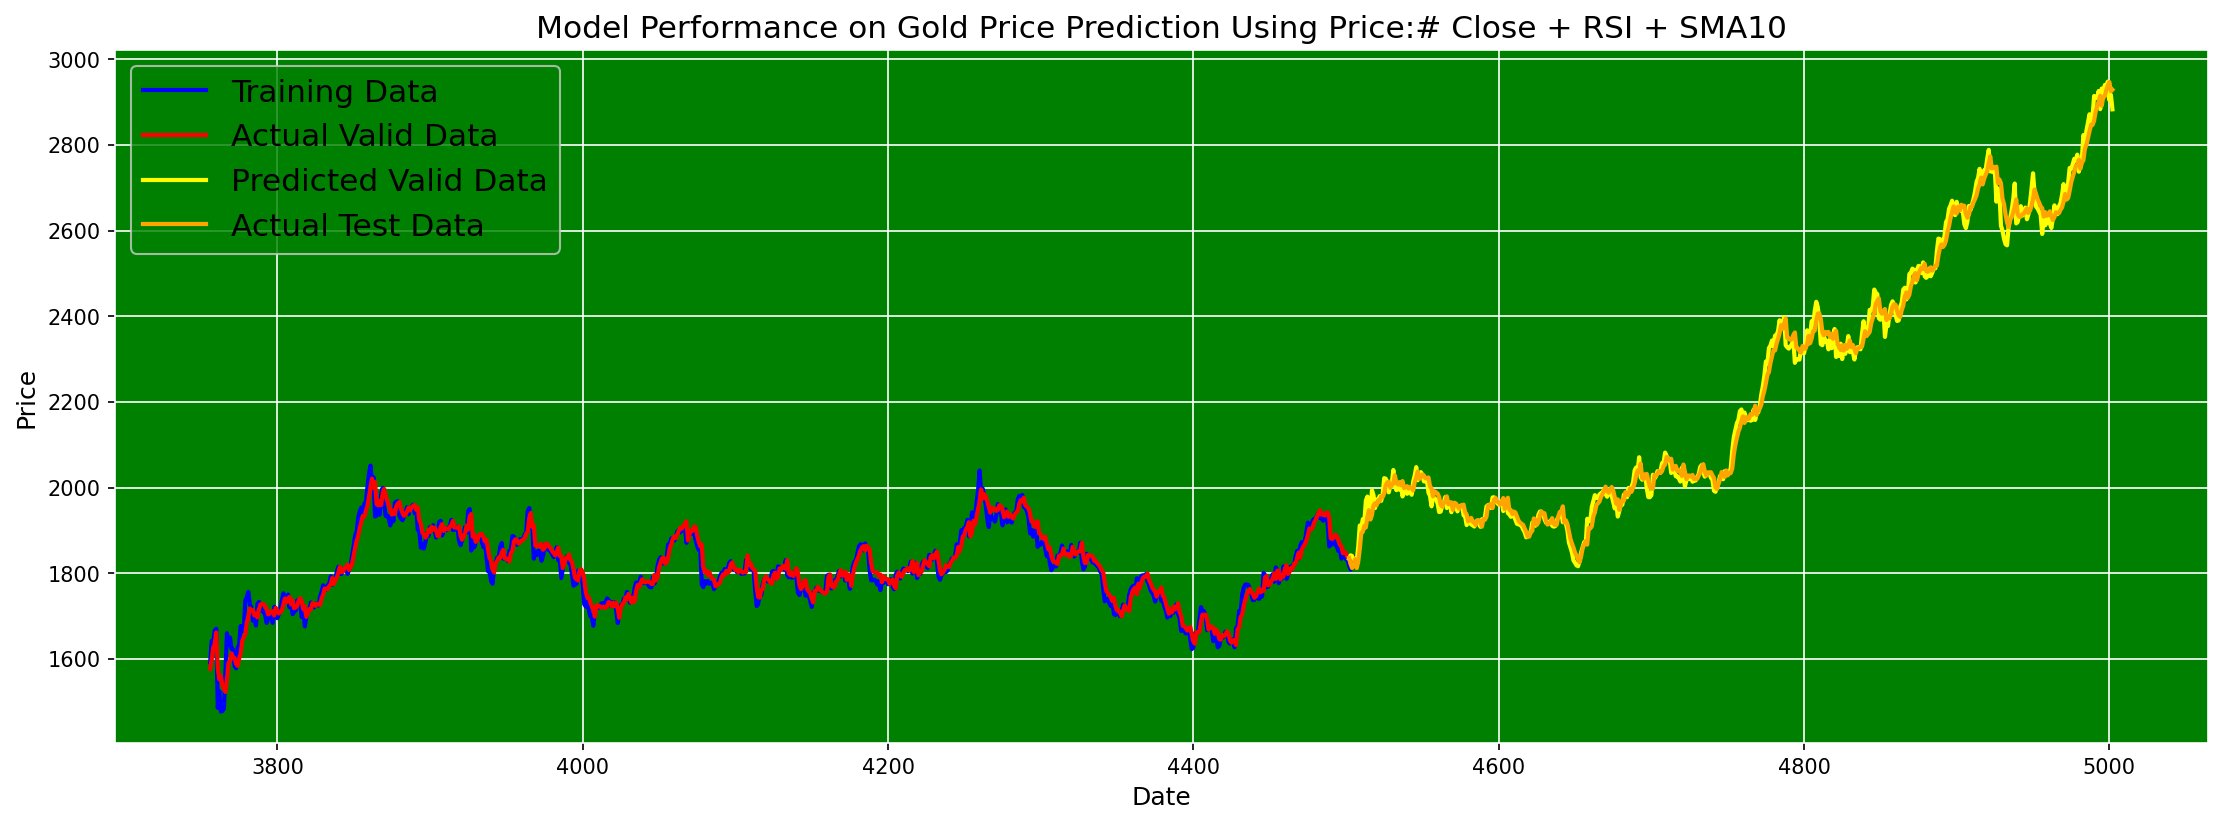

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price:# Close + RSI + SMA10', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**High, Low + RSi**

In [ ]:
train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
# Low
scaler_Low = MinMaxScaler()
scaler_Low.fit(df.Low.values.reshape(-1,1))
train_data_Low = df['Low'][:train_size]
train_data_Low = scaler_Low.transform(train_data_Low.values.reshape(-1,1))

val_data_Low = df['Low'][train_size:train_size+val_size]
val_data_Low = scaler_Low.transform(val_data_Low.values.reshape(-1,1))

test_data_Low = df['Low'][train_size+val_size:]
test_data_Low = scaler_Low.transform(test_data_Low.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Low[i:i+window])
  temp = np.append(temp, train_data_rsi[i:i+window])

  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Low[i+3751-window:i+3751])
  temp = np.append(temp, train_data_rsi[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Low[i:i+window])
  temp = np.append(temp, val_data_rsi[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Low[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_rsi[i+len(x_val)-window-window:i+len(x_val)-window])

  x_test.append(temp)

  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Low[i:i+window])
  temp = np.append(temp, test_data_rsi[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 15, 1), (3751, 1), (751, 15, 1), (751, 1), (501, 15, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │         7,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 429.5977 - root_mean_squared_error: 19.9649 - val_loss: 0.5728 - val_root_mean_squared_error: 0.7568
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1743 - root_mean_squared_error: 0.4173 - val_loss: 0.4655 - val_root_mean_squared_error: 0.6823
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1173 - root_mean_squared_error: 0.3421 - val_loss: 0.3207 - val_root_mean_squared_error: 0.5663
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0752 - root_mean_squared_error: 0.2740 - val_loss: 0.2024 - val_root_mean_squared_error: 0.4499
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0538 - root_mean_squared_error: 0.2317 - val_loss: 0.1447 - val_root_mean_squared_error: 0.3803
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0378 - root_mean_squared_error: 0.1934 - val_loss: 0.0524 - val_root_mean_squared_error: 0.2289
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3980e-05 - root_mean_squared_error: 0.0073  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
CPU times: user 225 ms, sys: 11.9 ms, total: 237 ms
Wall time: 366 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 5.5467404308728874e-05
Test RMSE: 0.0074476441368460655
Test MAPE: 0.007932373766665645
Test Accuracy: 0.9920676262333343


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


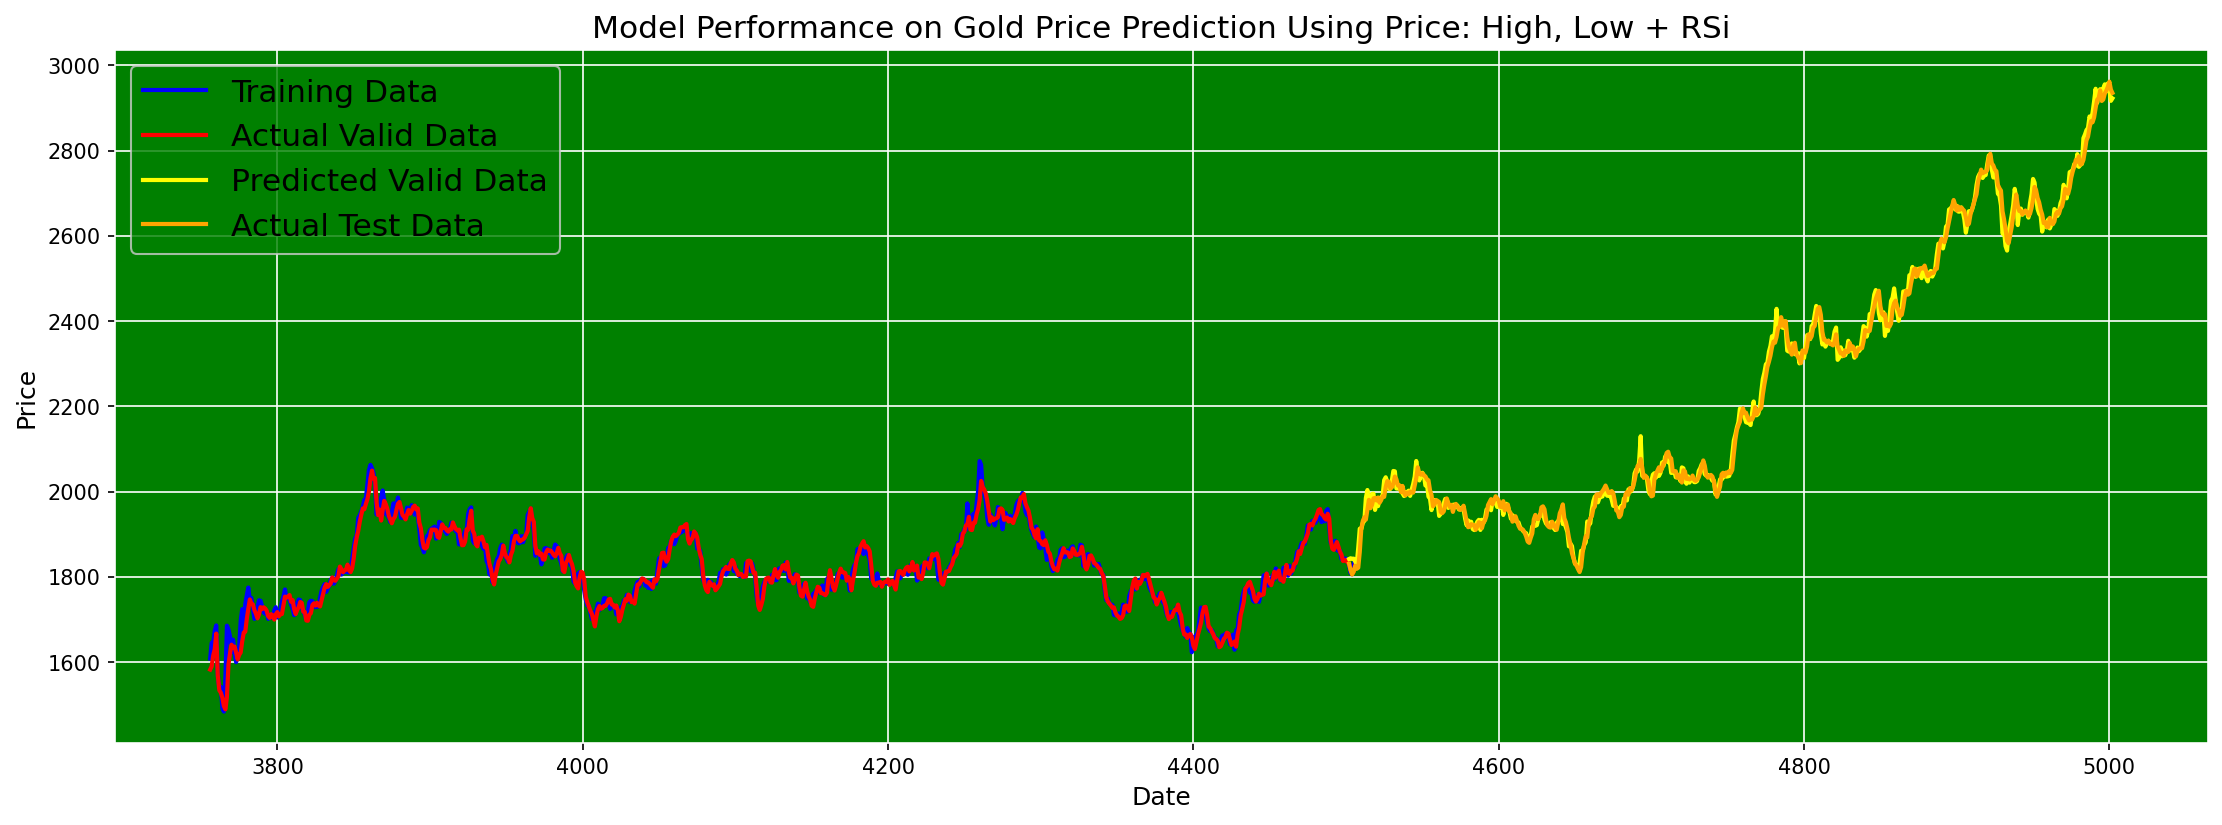

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: High, Low + RSi', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Close + RSI + SMA10 + SMA20**

In [ ]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_rsi[i:i+window])
  temp = np.append(temp, train_data_sma10[i:i+window])
  temp = np.append(temp, train_data_sma20[i:i+window])

  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_rsi[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma20[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_rsi[i:i+window])
  temp = np.append(temp, val_data_sma10[i:i+window])
  temp = np.append(temp, val_data_sma20[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_rsi[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma20[i+len(x_val)-window-window:i+len(x_val)-window])

  x_test.append(temp)

  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_rsi[i:i+window])
  temp = np.append(temp, test_data_sma10[i:i+window])
  temp = np.append(temp, test_data_sma20[i:i+window])

  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 20, 1), (3751, 1), (751, 20, 1), (751, 1), (501, 20, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 19, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │         9,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,937 (38.82 KB)

 Trainable params: 9,937 (38.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0791 - root_mean_squared_error: 0.2689 - val_loss: 0.1720 - val_root_mean_squared_error: 0.4148
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - root_mean_squared_error: 0.1505 - val_loss: 0.1441 - val_root_mean_squared_error: 0.3795
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0176 - root_mean_squared_error: 0.1327 - val_loss: 0.1222 - val_root_mean_squared_error: 0.3496
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.1005 - val_root_mean_squared_error: 0.3170
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - root_mean_squared_error: 0.1028 - val_loss: 0.0750 - val_root_mean_squared_error: 0.2739
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0072 - root_mean_squared_error: 0.0850 - val_loss: 0.0476 - val_root_mean_squared_error: 0.2182
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7149e-05 - root_mean_squared_error: 0.0093


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 213 ms, sys: 9.96 ms, total: 223 ms
Wall time: 369 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00010902997019002214
Test RMSE: 0.010441741906106472
Test MAPE: 0.010986882379268672
Test Accuracy: 0.9890131176207313


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


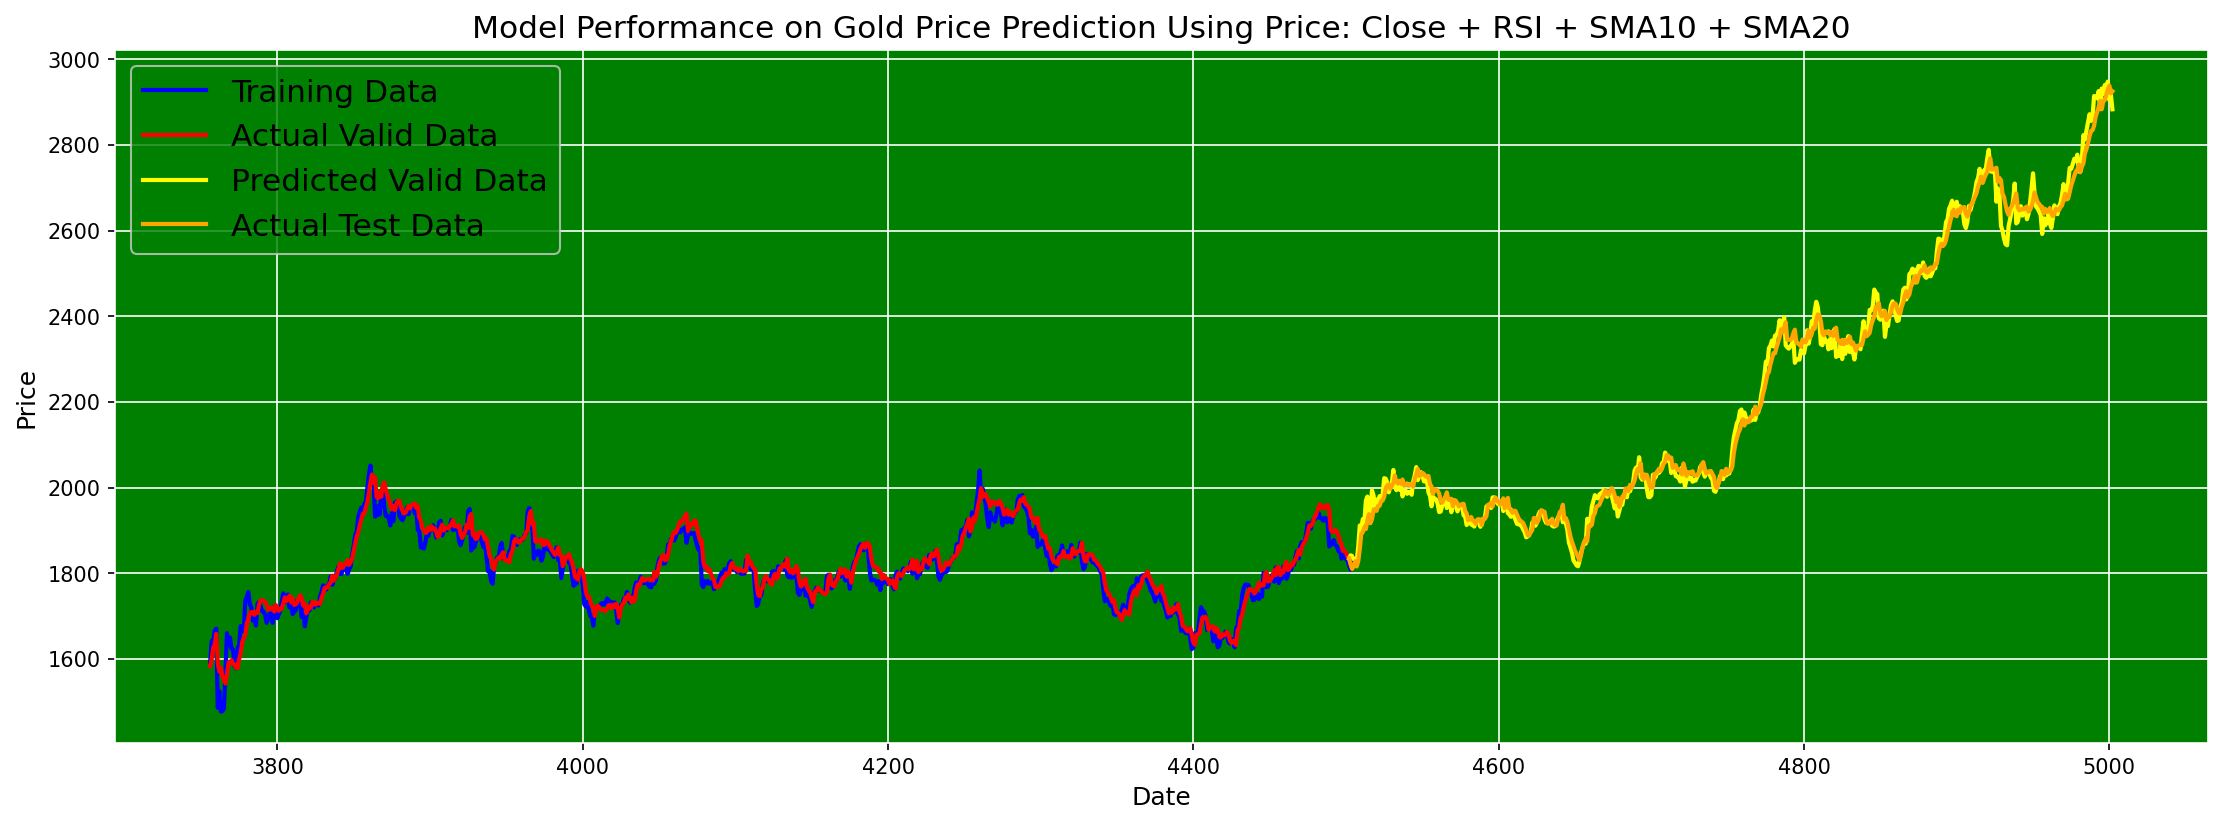

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Close + RSI + SMA10 + SMA20', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**High + RSI + SMA10 + SMA20**

In [ ]:
# Predicting gold price using High value

train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_rsi[i:i+window])
  temp = np.append(temp, train_data_sma10[i:i+window])
  temp = np.append(temp, train_data_sma20[i:i+window])

  x_train.append(temp)
  y_train.append(train_data[i+window])


In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_rsi[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma20[i+3751-window:i+3751])

  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_rsi[i:i+window])
  temp = np.append(temp, val_data_sma10[i:i+window])
  temp = np.append(temp, val_data_sma20[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])


In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_rsi[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma20[i+len(x_val)-window-window:i+len(x_val)-window])

  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_rsi[i:i+window])
  temp = np.append(temp, test_data_sma10[i:i+window])
  temp = np.append(temp, test_data_sma20[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 20, 1), (3751, 1), (751, 20, 1), (751, 1), (501, 20, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 19, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 8)              │         9,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,937 (38.82 KB)

 Trainable params: 9,937 (38.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1314 - root_mean_squared_error: 1.0272 - val_loss: 0.1702 - val_root_mean_squared_error: 0.4126
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1280 - root_mean_squared_error: 0.3550 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1747
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - root_mean_squared_error: 0.1419 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - root_mean_squared_error: 0.0604 - val_loss: 5.8608e-04 - val_root_mean_squared_error: 0.0242
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0347 - val_loss: 2.7358e-04 - val_root_mean_squared_error: 0.0165
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - root_mean_squared_error: 0.0364 - val_loss: 1.8563e-04 - val_root_mean_squared_error: 0.0136
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0036e-05 - root_mean_squared_error: 0.0083  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 223 ms, sys: 10 ms, total: 233 ms
Wall time: 369 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 7.922202348709106e-05
Test RMSE: 0.008900674991309643
Test MAPE: 0.00959680704717811
Test Accuracy: 0.9904031929528219


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


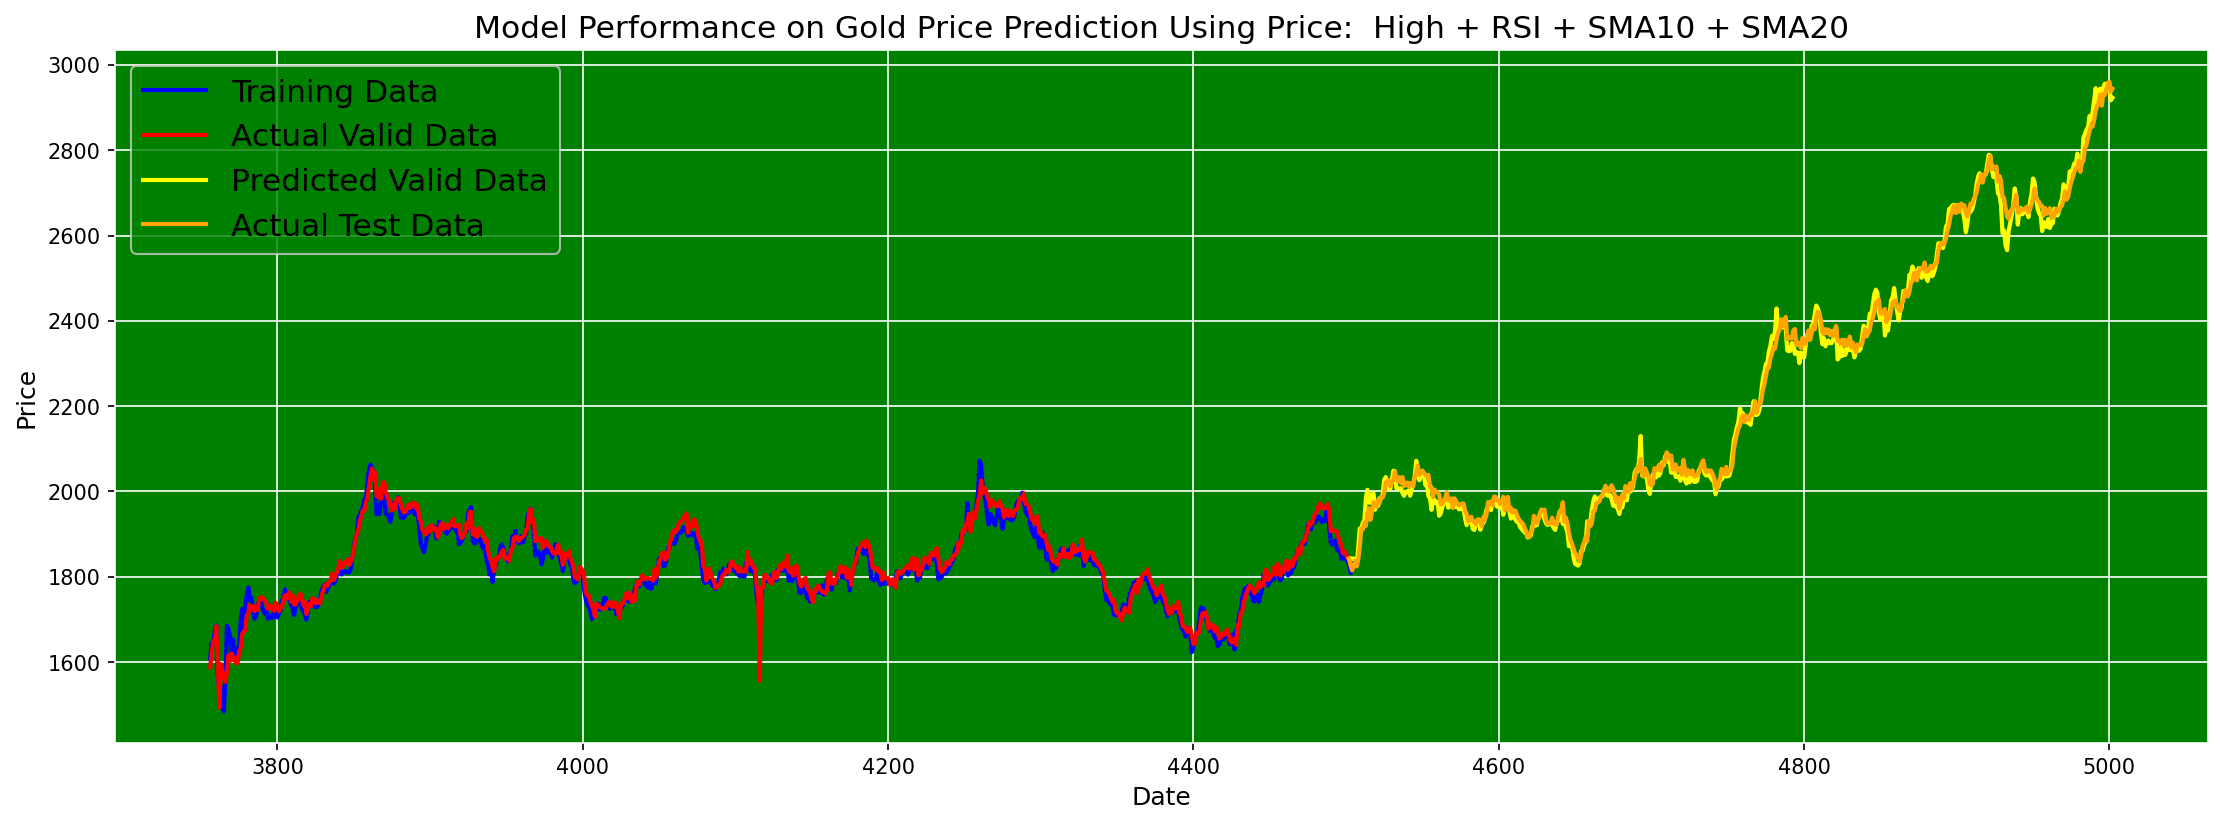

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price:  High + RSI + SMA10 + SMA20', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**# High , Low + SMA10 + SMA 20**

In [ ]:
train_data = df.High[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.High[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.High[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
# Low
scaler_Low = MinMaxScaler()
scaler_Low.fit(df.Low.values.reshape(-1,1))
train_data_Low = df['Low'][:train_size]
train_data_Low = scaler_Low.transform(train_data_Low.values.reshape(-1,1))

val_data_Low = df['Low'][train_size:train_size+val_size]
val_data_Low = scaler_Low.transform(val_data_Low.values.reshape(-1,1))

test_data_Low = df['Low'][train_size+val_size:]
test_data_Low = scaler_Low.transform(test_data_Low.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Low[i:i+window])
  temp = np.append(temp, train_data_sma10[i:i+window])
  temp = np.append(temp, train_data_sma20[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Low[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma20[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Low[i:i+window])
  temp = np.append(temp, val_data_sma10[i:i+window])
  temp = np.append(temp, val_data_sma20[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Low[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma20[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Low[i:i+window])
  temp = np.append(temp, test_data_sma10[i:i+window])
  temp = np.append(temp, test_data_sma20[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 20, 1), (3751, 1), (751, 20, 1), (751, 1), (501, 20, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 19, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 8)              │         9,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,937 (38.82 KB)

 Trainable params: 9,937 (38.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0239 - root_mean_squared_error: 0.1469 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0384
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7148e-04 - root_mean_squared_error: 0.0131 - val_loss: 8.4208e-04 - val_root_mean_squared_error: 0.0290
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2322e-04 - root_mean_squared_error: 0.0111 - val_loss: 5.3682e-04 - val_root_mean_squared_error: 0.0232
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8719e-05 - root_mean_squared_error: 0.0099 - val_loss: 3.3728e-04 - val_root_mean_squared_error: 0.0184
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3071e-05 - root_mean_squared_error: 0.0091 - val_loss: 2.5017e-04 - val_root_mean_squared_error: 0.0158
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7080e-05 - root_mean_squared_error: 0.0088 - val_loss: 2.2378e-04 - val_root_mean_squared_error: 0.0150
Epoch 7/50
1

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6508e-05 - root_mean_squared_error: 0.0075  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 225 ms, sys: 11 ms, total: 236 ms
Wall time: 231 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 5.9645186411216855e-05
Test RMSE: 0.00772302970290184
Test MAPE: 0.008348729841522328
Test Accuracy: 0.9916512701584776


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


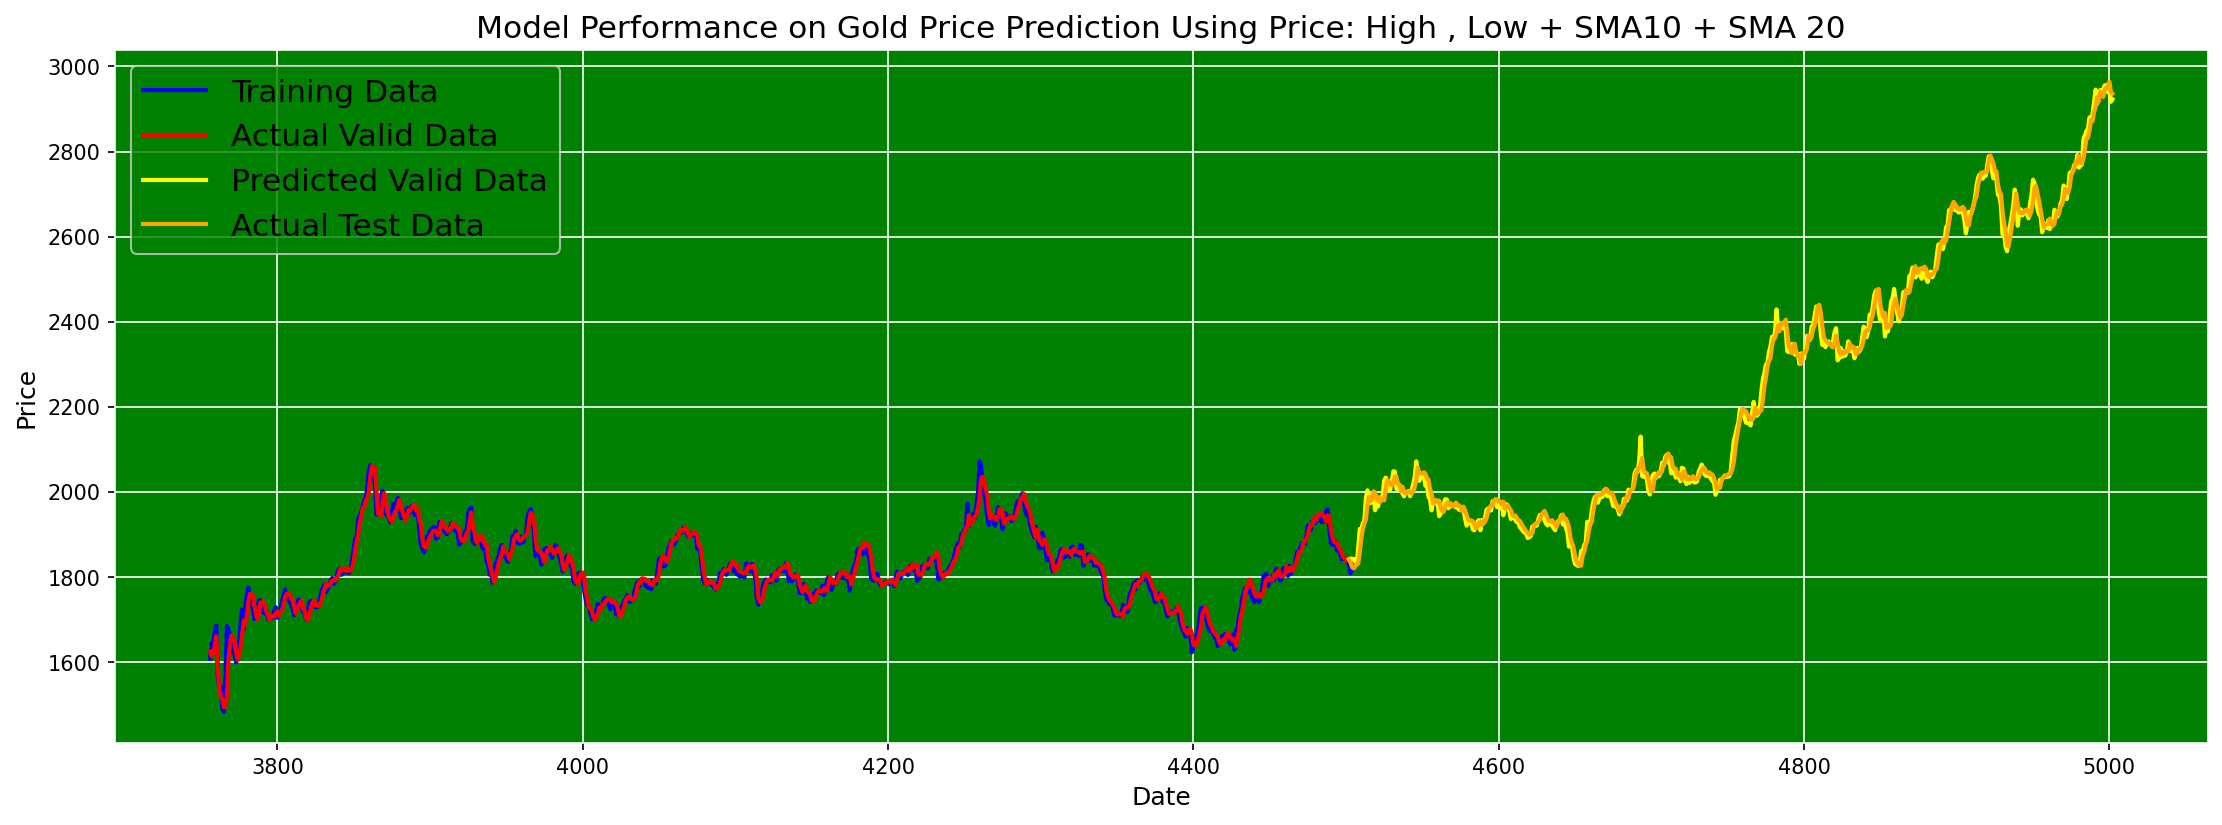

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: High , Low + SMA10 + SMA 20', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Close + RSI + SMA10 + SMA 20t**

In [ ]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_rsi[i:i+window])
  temp = np.append(temp, train_data_sma10[i:i+window])
  temp = np.append(temp, train_data_sma20[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_rsi[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma20[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_rsi[i:i+window])
  temp = np.append(temp, val_data_sma10[i:i+window])
  temp = np.append(temp, val_data_sma20[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_rsi[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma20[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_rsi[i:i+window])
  temp = np.append(temp, test_data_sma10[i:i+window])
  temp = np.append(temp, test_data_sma20[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 20, 1), (3751, 1), (751, 20, 1), (751, 1), (501, 20, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_17 (Conv1D)              │ (None, 19, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │         9,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,937 (38.82 KB)

 Trainable params: 9,937 (38.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.2305 - root_mean_squared_error: 2.2742 - val_loss: 0.4198 - val_root_mean_squared_error: 0.6479
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1164 - root_mean_squared_error: 0.3409 - val_loss: 0.3136 - val_root_mean_squared_error: 0.5600
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0636 - root_mean_squared_error: 0.2518 - val_loss: 0.1573 - val_root_mean_squared_error: 0.3966
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0327 - root_mean_squared_error: 0.1803 - val_loss: 0.1066 - val_root_mean_squared_error: 0.3266
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0154 - root_mean_squared_error: 0.1237 - val_loss: 0.0506 - val_root_mean_squared_error: 0.2250
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - root_mean_squared_error: 0.0802 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1774
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8591e-05 - root_mean_squared_error: 0.0088  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 209 ms, sys: 9.04 ms, total: 218 ms
Wall time: 212 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 9.943995246430859e-05
Test RMSE: 0.009971958585083485
Test MAPE: 0.010553597348014502
Test Accuracy: 0.9894464026519855


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


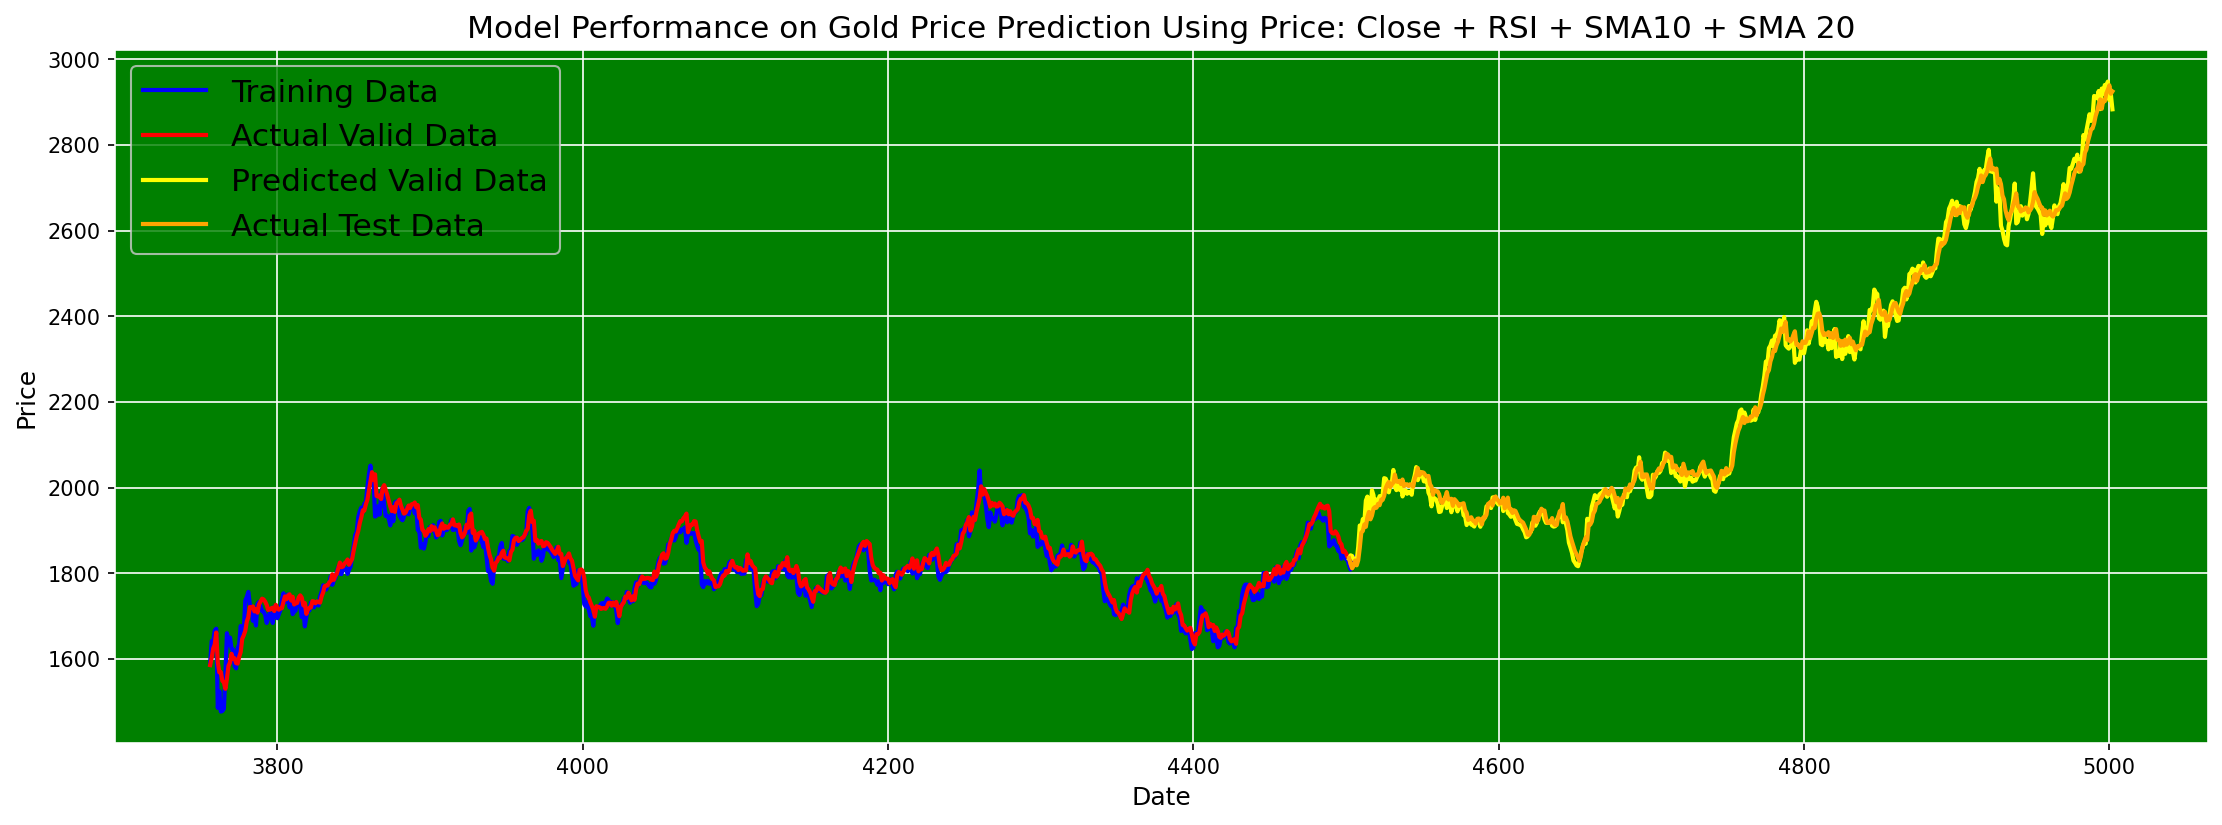

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Close + RSI + SMA10 + SMA 20', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

** Low + RSI + SMA10 + SMA20**

In [ ]:
train_data = df.Low[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Low[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Low[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.SMA10.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_rsi[i:i+window])
  temp = np.append(temp, train_data_sma10[i:i+window])
  temp = np.append(temp, train_data_sma20[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_rsi[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma20[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_rsi[i:i+window])
  temp = np.append(temp, val_data_sma10[i:i+window])
  temp = np.append(temp, val_data_sma20[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_rsi[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma20[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_rsi[i:i+window])
  temp = np.append(temp, test_data_sma10[i:i+window])
  temp = np.append(temp, test_data_sma20[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 20, 1), (3751, 1), (751, 20, 1), (751, 1), (501, 20, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 19, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         9,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,937 (38.82 KB)

 Trainable params: 9,937 (38.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 2.8391 - root_mean_squared_error: 1.5852 - val_loss: 0.4807 - val_root_mean_squared_error: 0.6933
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3111 - root_mean_squared_error: 0.5571 - val_loss: 0.2741 - val_root_mean_squared_error: 0.5236
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1515 - root_mean_squared_error: 0.3890 - val_loss: 0.1890 - val_root_mean_squared_error: 0.4348
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0701 - root_mean_squared_error: 0.2644 - val_loss: 0.0579 - val_root_mean_squared_error: 0.2407
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0259 - root_mean_squared_error: 0.1608 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1536
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0088 - root_mean_squared_error: 0.0937 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1099
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9146e-05 - root_mean_squared_error: 0.0082


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
CPU times: user 371 ms, sys: 13.9 ms, total: 385 ms
Wall time: 425 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 8.541851275367662e-05
Test RMSE: 0.00924221333116293
Test MAPE: 0.009621827873413834
Test Accuracy: 0.9903781721265862


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


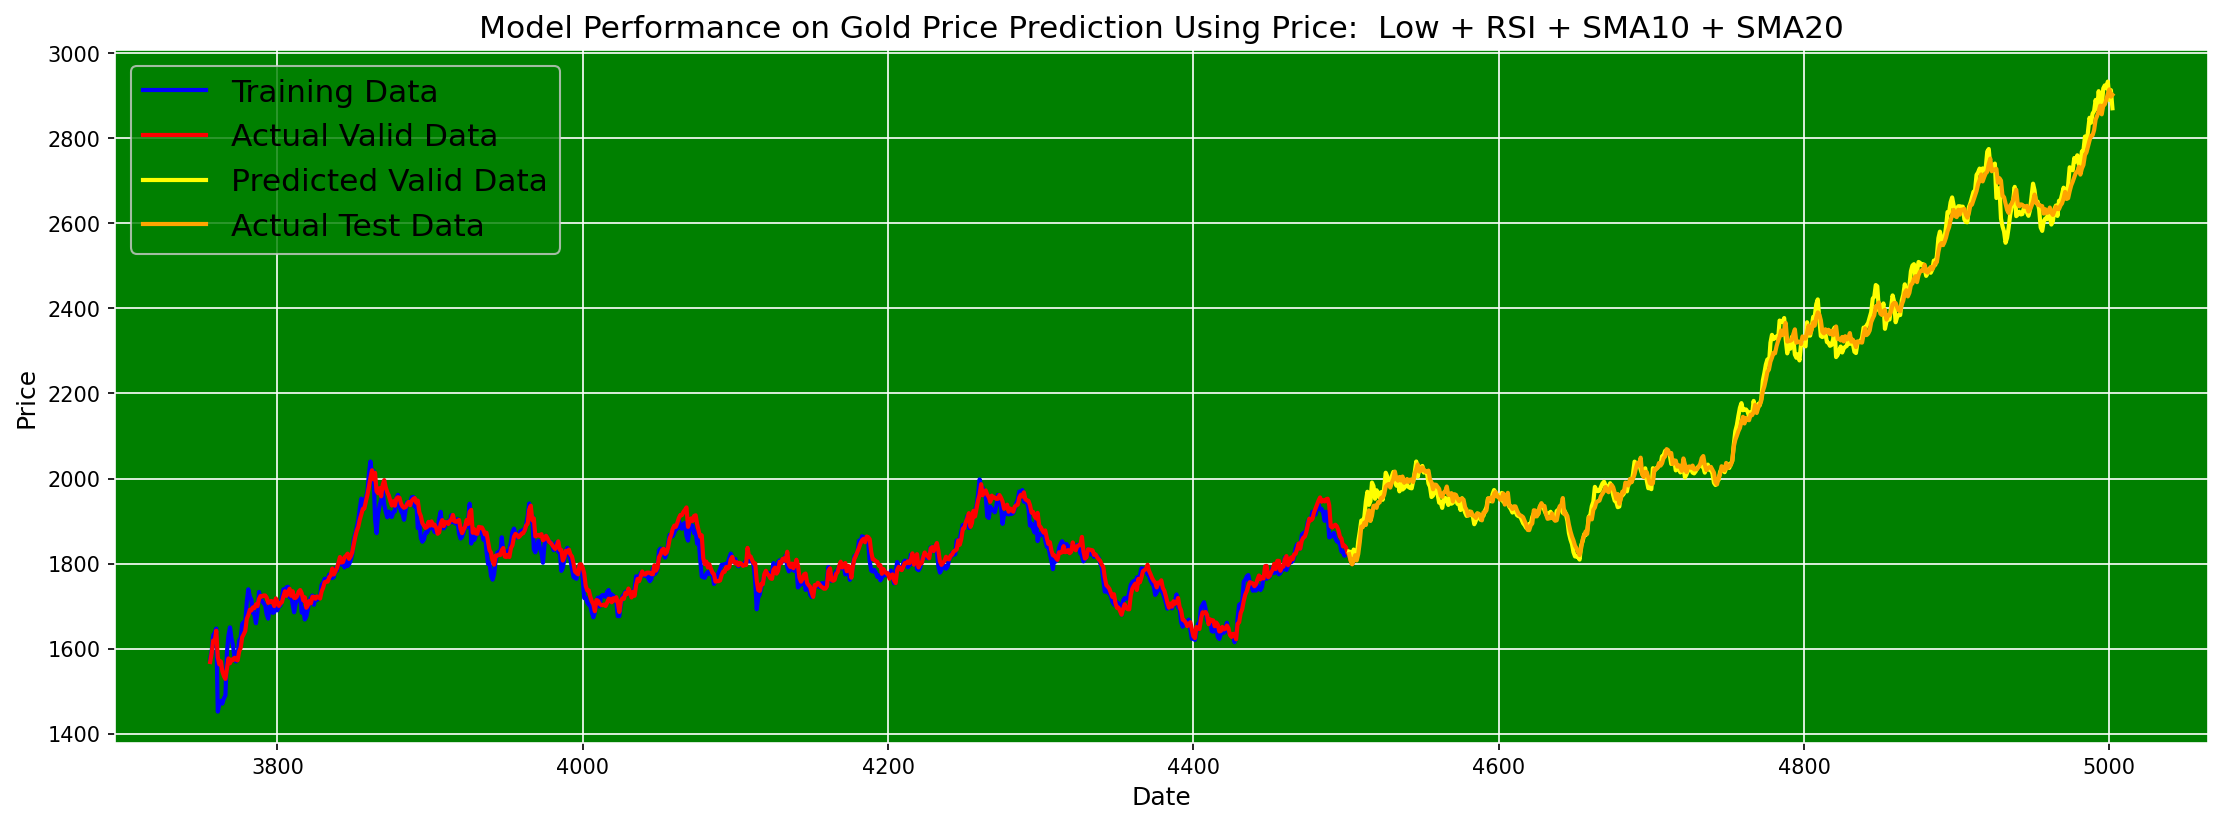

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price:  Low + RSI + SMA10 + SMA20', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**# Volume + RSI + SMA10 + SMA20**

In [ ]:
train_data = df.Volume[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Volume[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Volume[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA20'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_sma10[i:i+window])
  temp = np.append(temp, train_data_sma20[i:i+window])
  temp = np.append(temp, train_data_rsi[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma20[i+3751-window:i+3751])
  temp = np.append(temp, train_data_rsi[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_sma10[i:i+window])
  temp = np.append(temp, val_data_sma20[i:i+window])
  temp = np.append(temp, val_data_rsi[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma20[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_rsi[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_sma10[i:i+window])
  temp = np.append(temp, test_data_sma20[i:i+window])
  temp = np.append(temp, test_data_rsi[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 20, 1), (3751, 1), (751, 20, 1), (751, 1), (501, 20, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 19, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         9,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,937 (38.82 KB)

 Trainable params: 9,937 (38.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 109.4274 - root_mean_squared_error: 10.3743 - val_loss: 76.2400 - val_root_mean_squared_error: 8.7316
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 132.9133 - root_mean_squared_error: 11.4852 - val_loss: 76.2485 - val_root_mean_squared_error: 8.7320
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 119.0289 - root_mean_squared_error: 10.8802 - val_loss: 77.1534 - val_root_mean_squared_error: 8.7837
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 125.4443 - root_mean_squared_error: 11.1433 - val_loss: 76.3140 - val_root_mean_squared_error: 8.7358
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 85.0166 - root_mean_squared_error: 9.0638 - val_loss: 76.8817 - val_root_mean_squared_error: 8.7682
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 117.7513 - root_mean_squared_error: 10.7911 - val_loss: 76.3278 - val_root_mean_squared_error: 8.7366
Epoch 7/50
118/118 ━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.9146e-05 - root_mean_squared_error: 0.0082  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
CPU times: user 302 ms, sys: 14 ms, total: 316 ms
Wall time: 310 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 8.541851275367662e-05
Test RMSE: 0.00924221333116293
Test MAPE: 0.009621827873413834
Test Accuracy: 0.9903781721265862


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


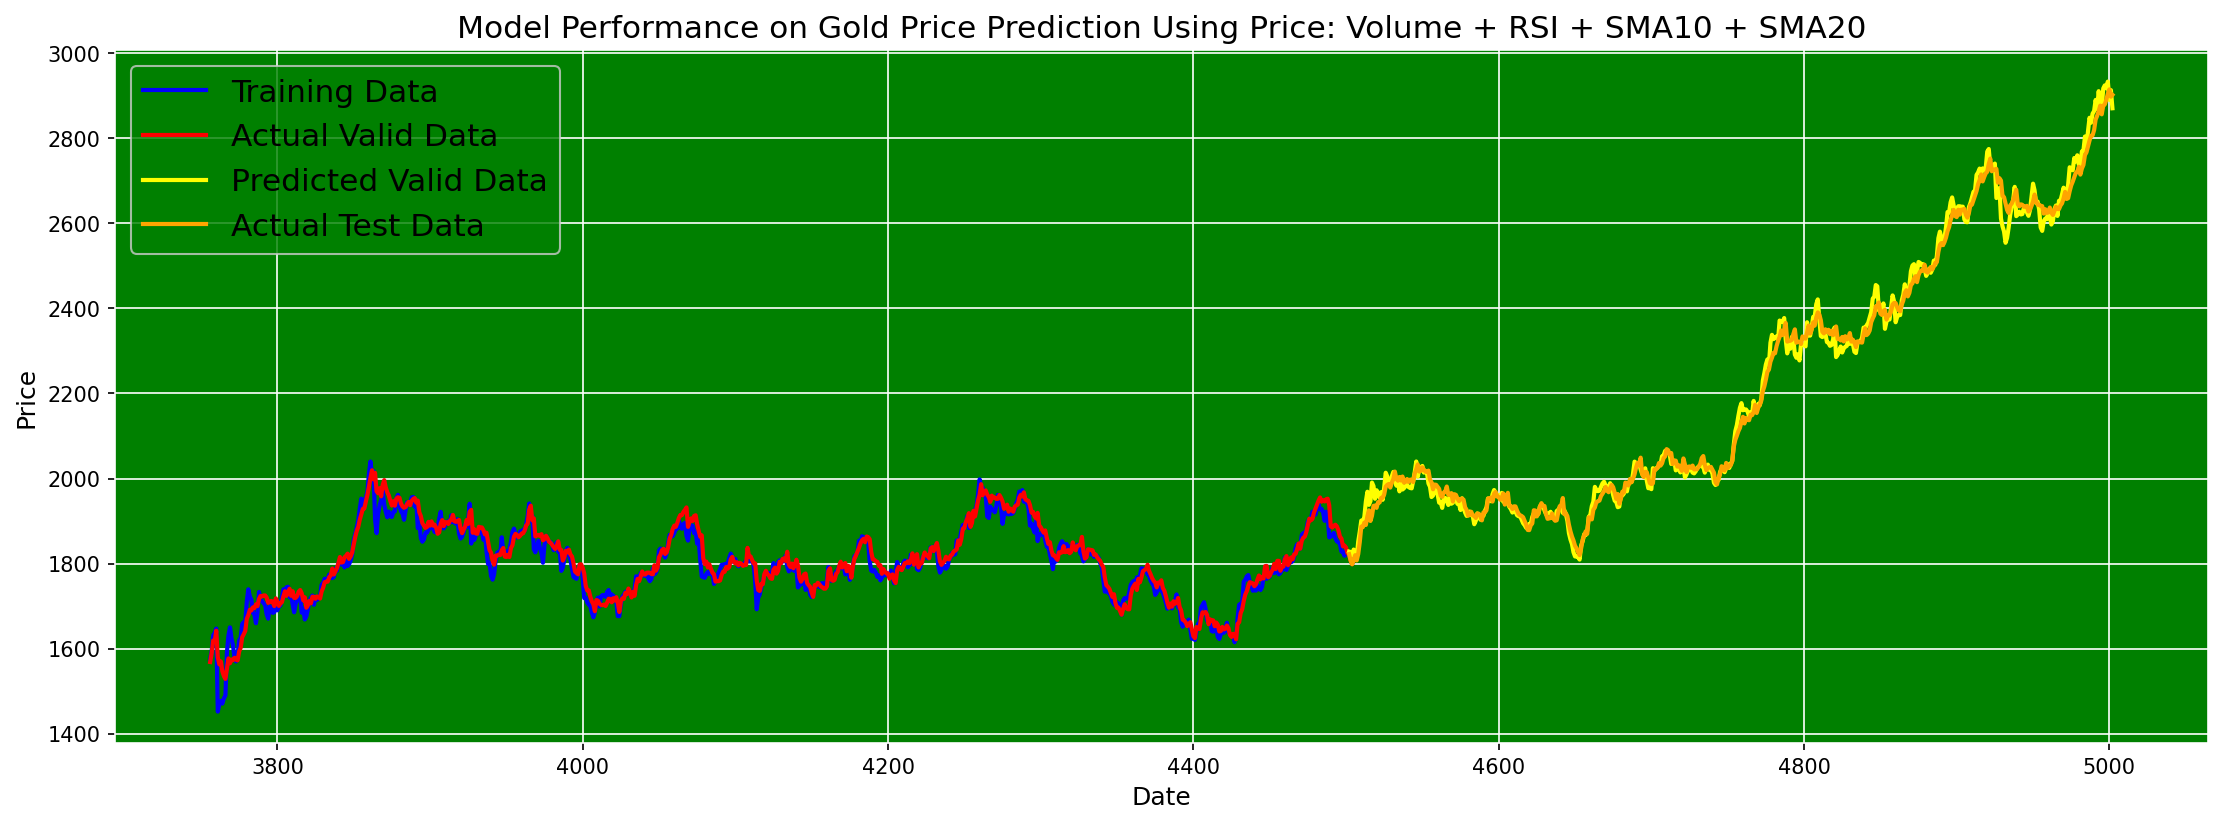

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Volume + RSI + SMA10 + SMA20', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Open . Close + RSI**

In [ ]:
train_data = df.Open[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Open[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Open[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
# Close
scaler_Close = MinMaxScaler()
scaler_Close.fit(df.Close.values.reshape(-1,1))
train_data_Close = df['Close'][:train_size]
train_data_Close = scaler_Close.transform(train_data_Close.values.reshape(-1,1))

val_data_Close = df['Close'][train_size:train_size+val_size]
val_data_Close = scaler_Close.transform(val_data_Close.values.reshape(-1,1))

test_data_Close = df['Close'][train_size+val_size:]
test_data_Close = scaler_Close.transform(test_data_Close.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Close[i:i+window])
  temp = np.append(temp, train_data_rsi[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Close[i+3751-window:i+3751])
  temp = np.append(temp, train_data_rsi[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Close[i:i+window])
  temp = np.append(temp, val_data_rsi[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Close[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_rsi[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Close[i:i+window])
  temp = np.append(temp, test_data_rsi[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 15, 1), (3751, 1), (751, 15, 1), (751, 1), (501, 15, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         7,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 17.8301 - root_mean_squared_error: 3.8821 - val_loss: 0.4358 - val_root_mean_squared_error: 0.6601
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1666 - root_mean_squared_error: 0.4063 - val_loss: 0.1014 - val_root_mean_squared_error: 0.3184
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0395 - root_mean_squared_error: 0.1979 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1424
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0698
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0024 - root_mean_squared_error: 0.0482 - val_loss: 6.5477e-04 - val_root_mean_squared_error: 0.0256
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.9462e-04 - root_mean_squared_error: 0.0279 - val_loss: 7.5957e-05 - val_root_mean_squared_error: 0.0087
Epoch 7/50
118/118 ━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9241e-05 - root_mean_squared_error: 0.0054


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
CPU times: user 368 ms, sys: 3.87 ms, total: 372 ms
Wall time: 432 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 3.607650796766393e-05
Test RMSE: 0.006006372161209583
Test MAPE: 0.005831753864581153
Test Accuracy: 0.9941682461354189


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


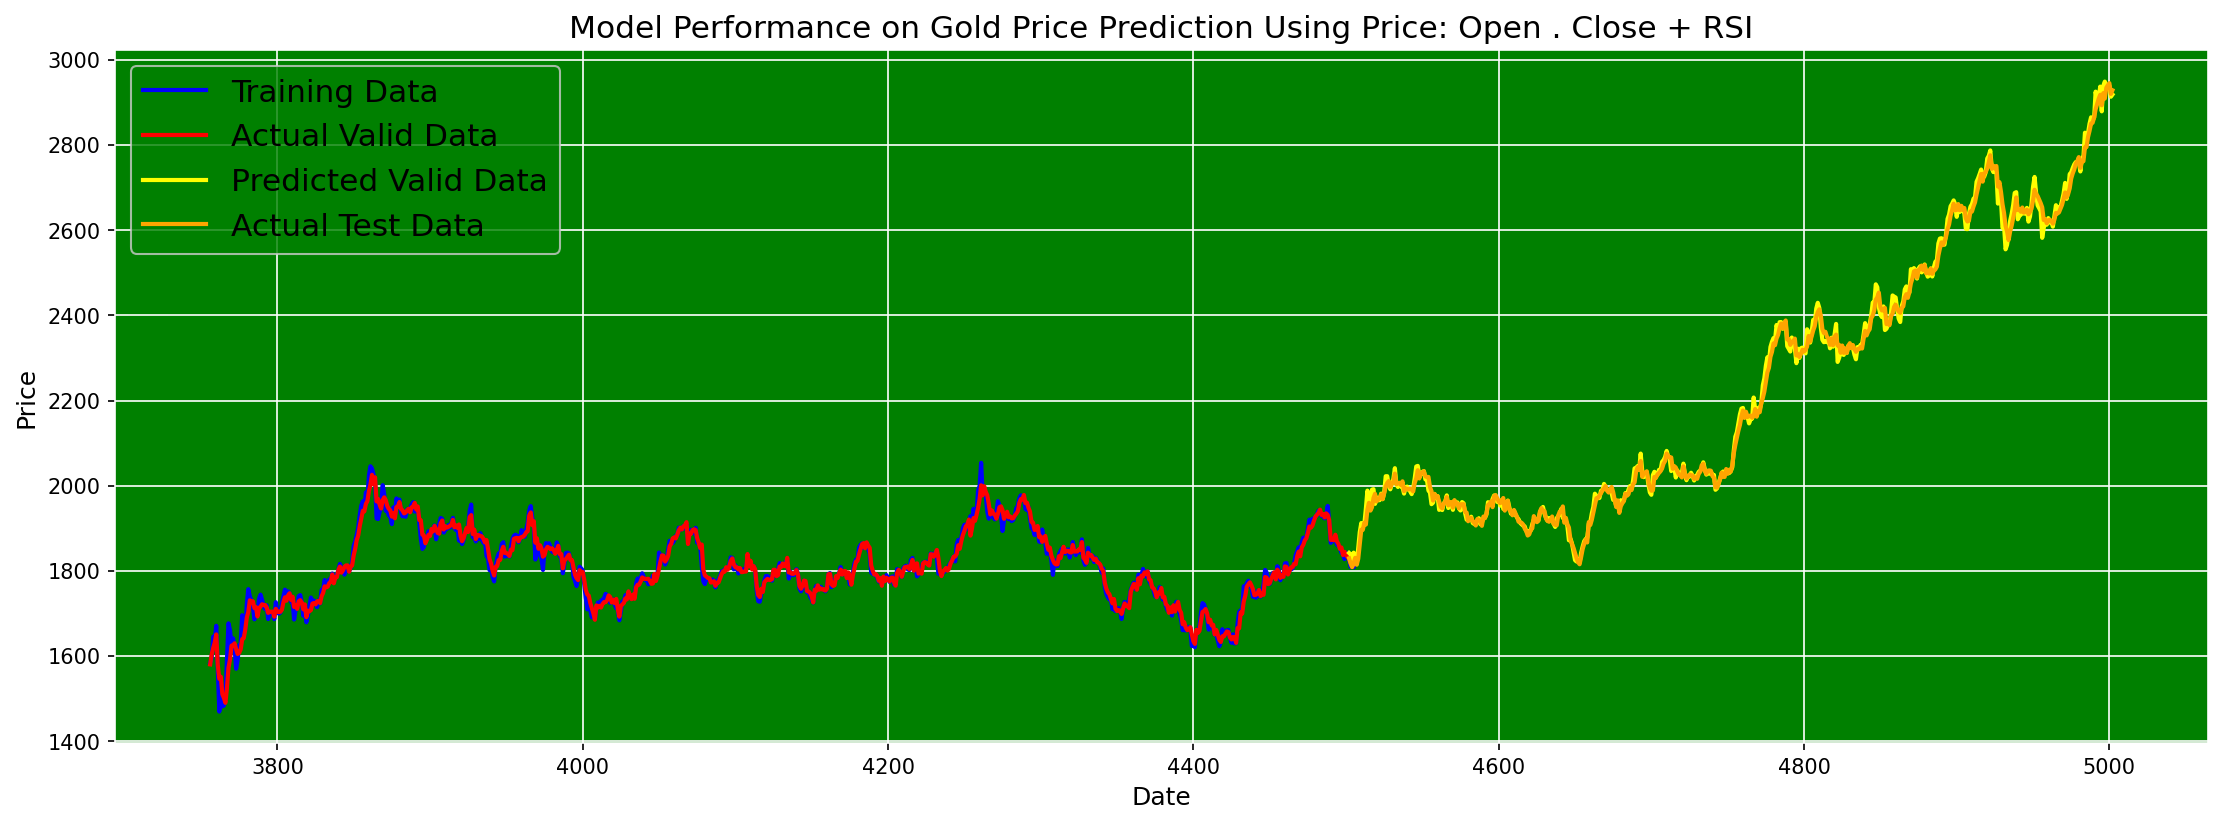

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Open . Close + RSI', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Open + SMA10,SMA20**

In [ ]:
train_data = df.Open[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Open[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Open[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.SMA10.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_sma10[i:i+window])
  temp = np.append(temp, train_data_sma20[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma20[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_sma10[i:i+window])
  temp = np.append(temp, val_data_sma20[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma20[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_sma10[i:i+window])
  temp = np.append(temp, test_data_sma20[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 15, 1), (3751, 1), (751, 15, 1), (751, 1), (501, 15, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │         7,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0551 - root_mean_squared_error: 0.2272 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.4224e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0675
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8221e-04 - root_mean_squared_error: 0.0219 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0543
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9938e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0403
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9323e-04 - root_mean_squared_error: 0.0139 - val_loss: 9.5650e-04 - val_root_mean_squared_error: 0.0309
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2973e-04 - root_mean_squared_error: 0.0114 - val_loss: 5.1247e-04 - val_root_mean_squared_error: 0.0226
Epoch 7/50
118/118 ━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.9330e-05 - root_mean_squared_error: 0.0094


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
CPU times: user 394 ms, sys: 6.59 ms, total: 401 ms
Wall time: 440 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00010850548278540373
Test RMSE: 0.010416596196591854
Test MAPE: 0.01117073956536016
Test Accuracy: 0.9888292604346398


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


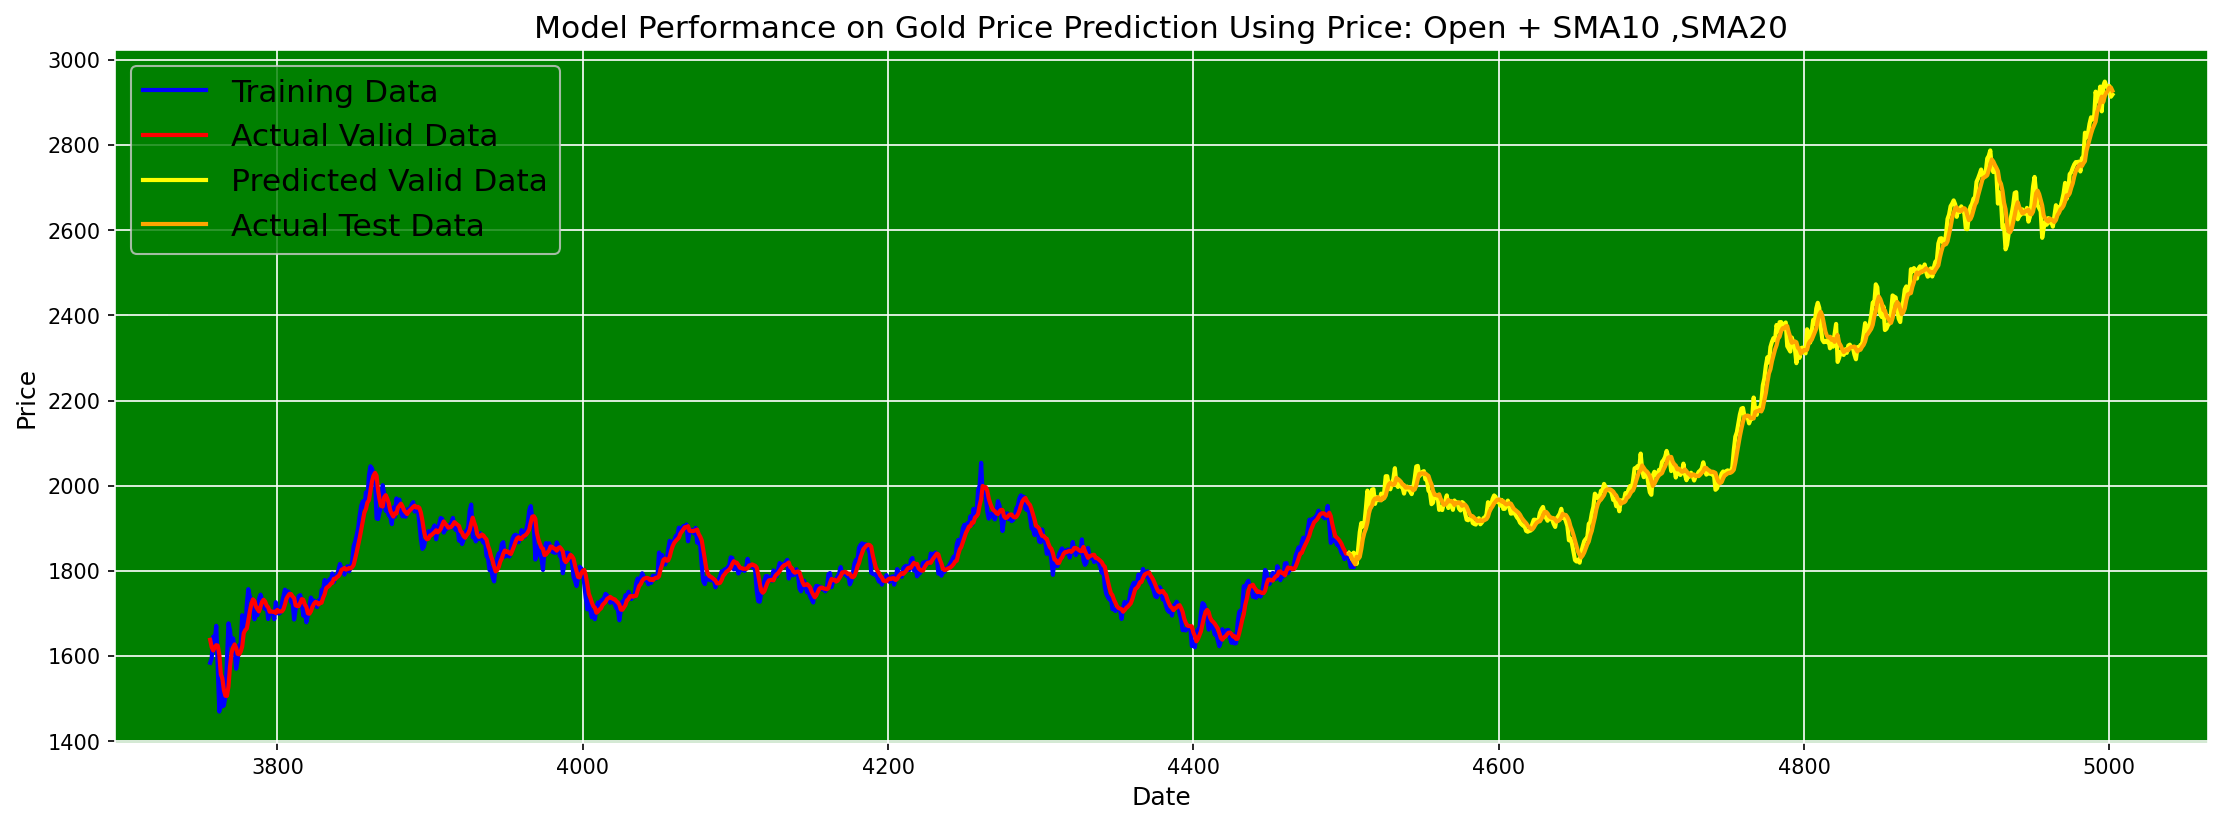

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Open + SMA10 ,SMA20', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Open,Close+ SMA10,SMA20**

In [ ]:
train_data = df.Open[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Open[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Open[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
scaler_Close = MinMaxScaler()
scaler_Close.fit(df.Close.values.reshape(-1,1))
train_data_Close = df['Close'][:train_size]
train_data_Close = scaler_Close.transform(train_data_Close.values.reshape(-1,1))

val_data_Close = df['Close'][train_size:train_size+val_size]
val_data_Close = scaler_Close.transform(val_data_Close.values.reshape(-1,1))

test_data_Close = df['Close'][train_size+val_size:]
test_data_Close = scaler_Close.transform(test_data_Close.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.SMA10.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA20'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_Close[i:i+window])
  temp = np.append(temp, train_data_sma10[i:i+window])
  temp = np.append(temp, train_data_sma20[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_Close[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  temp = np.append(temp, train_data_sma20[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_Close[i:i+window])
  temp = np.append(temp, val_data_sma10[i:i+window])
  temp = np.append(temp, val_data_sma20[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_Close[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  temp = np.append(temp, val_data_sma20[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_Close[i:i+window])
  temp = np.append(temp, test_data_sma10[i:i+window])
  temp = np.append(temp, test_data_sma20[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 20, 1), (3751, 1), (751, 20, 1), (751, 1), (501, 20, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 19, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         9,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,937 (38.82 KB)

 Trainable params: 9,937 (38.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 50,callbacks=[cp])

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0312 - root_mean_squared_error: 0.1648 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6954e-04 - root_mean_squared_error: 0.0130 - val_loss: 9.1448e-04 - val_root_mean_squared_error: 0.0302
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.2806e-04 - root_mean_squared_error: 0.0113 - val_loss: 5.5269e-04 - val_root_mean_squared_error: 0.0235
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 9.2531e-05 - root_mean_squared_error: 0.0096 - val_loss: 3.7717e-04 - val_root_mean_squared_error: 0.0194
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.6788e-05 - root_mean_squared_error: 0.0088 - val_loss: 2.8117e-04 - val_root_mean_squared_error: 0.0168
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.4097e-05 - root_mean_squared_error: 0.0086 - val_loss: 2.2835e-04 - val_root_mean_squared_error: 0.0151
Epoch 

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4019e-05 - root_mean_squared_error: 0.0049


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
CPU times: user 395 ms, sys: 18.8 ms, total: 414 ms
Wall time: 748 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 2.52860027103452e-05
Test RMSE: 0.005028518848121166
Test MAPE: 0.005153114834069325
Test Accuracy: 0.9948468851659307


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


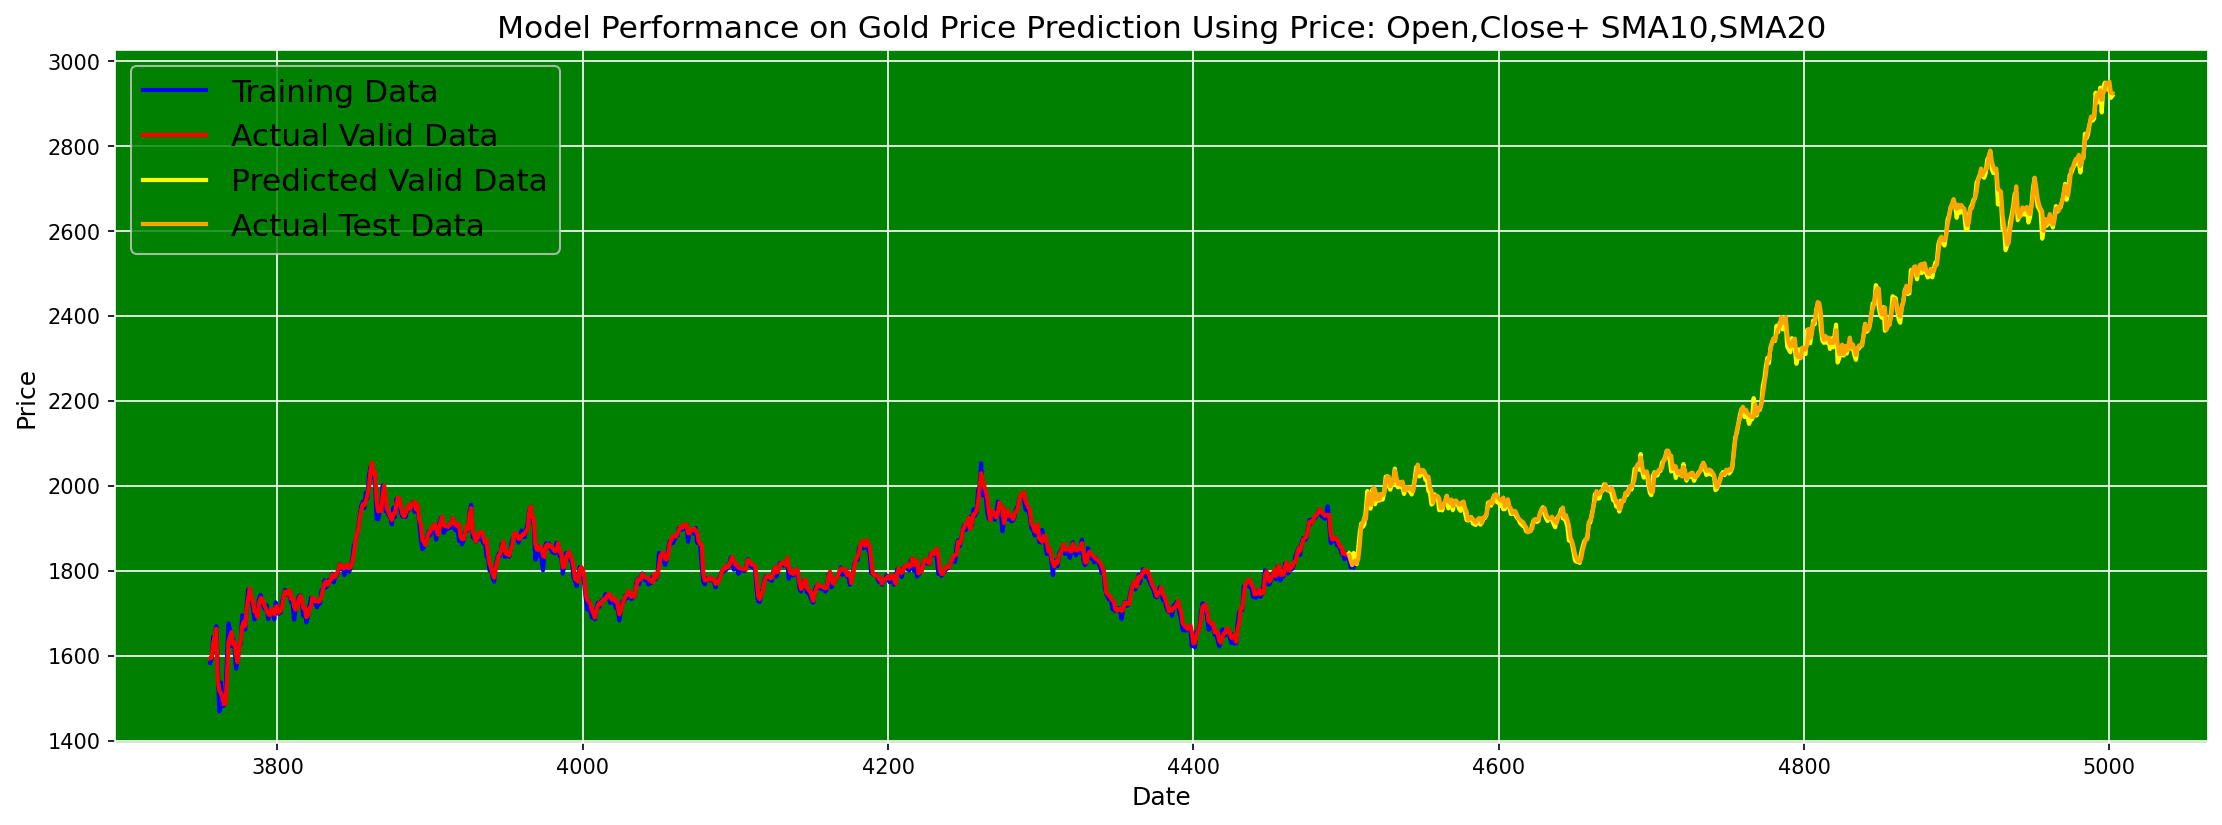

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
# plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using Price: Open,Close+ SMA10,SMA20', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()